In [145]:
import os
import pandas as pd
from pandas import read_csv
from datetime import datetime
os.chdir(r"C:\Users\USER\Desktop\ETo data")
data = read_csv('Abeokuta.csv', header = 6, names = ['Date', 'Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation', 'ETo'])
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
df = data['Sunlight hours']
data.head(7)




Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01      22.4      32.5        1.11        9.846111         17.34048   
1979-02-01      22.5      33.7        1.63        9.750278         17.54784   
1979-03-01      23.3      33.8        1.75        9.999722         18.73152   
1979-04-01      22.9      32.4        1.99        9.723889         17.33184   
1979-05-01      21.9      30.5        1.43        9.997778         18.84384   
1979-06-01      21.3      28.5        1.73        8.647778         13.45248   
1979-07-01      20.9      27.5        1.91        7.655000         11.08512   

             ETo  
Date              
1979-01-01  3.97  
1979-02-01  4.53  
1979-03-01  4.84  
1979-04-01  4.61  
1979-05-01  4.33  
1979-06-01  3.44  
1979-07-01  3.08

In [2]:
print(data.isnull())
print(data.isnull().any())

            Temp min  Temp max  Wind speed  Sunlight hours  Solar Radiation  \
Date                                                                          
1979-01-01     False     False       False           False            False   
1979-02-01     False     False       False           False            False   
1979-03-01     False     False       False           False            False   
1979-04-01     False     False       False           False            False   
1979-05-01     False     False       False           False            False   
...              ...       ...         ...             ...              ...   
2016-10-01     False     False       False           False            False   
2016-11-01     False     False       False           False            False   
2016-12-01     False     False       False           False            False   
2017-01-01     False     False       False           False            False   
2017-02-01     False     False       False          

In [3]:
import math
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
import plotly.graph_objects as go
import statistics
from scipy import stats
import plotly.express as px
from sklearn.metrics import mean_squared_error


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


array([[<AxesSubplot:title={'center':'Temp min'}>,
        <AxesSubplot:title={'center':'Temp max'}>],
       [<AxesSubplot:title={'center':'Wind speed'}>,
        <AxesSubplot:title={'center':'Sunlight hours'}>],
       [<AxesSubplot:title={'center':'Solar Radiation'}>,
        <AxesSubplot:title={'center':'ETo'}>]], dtype=object)

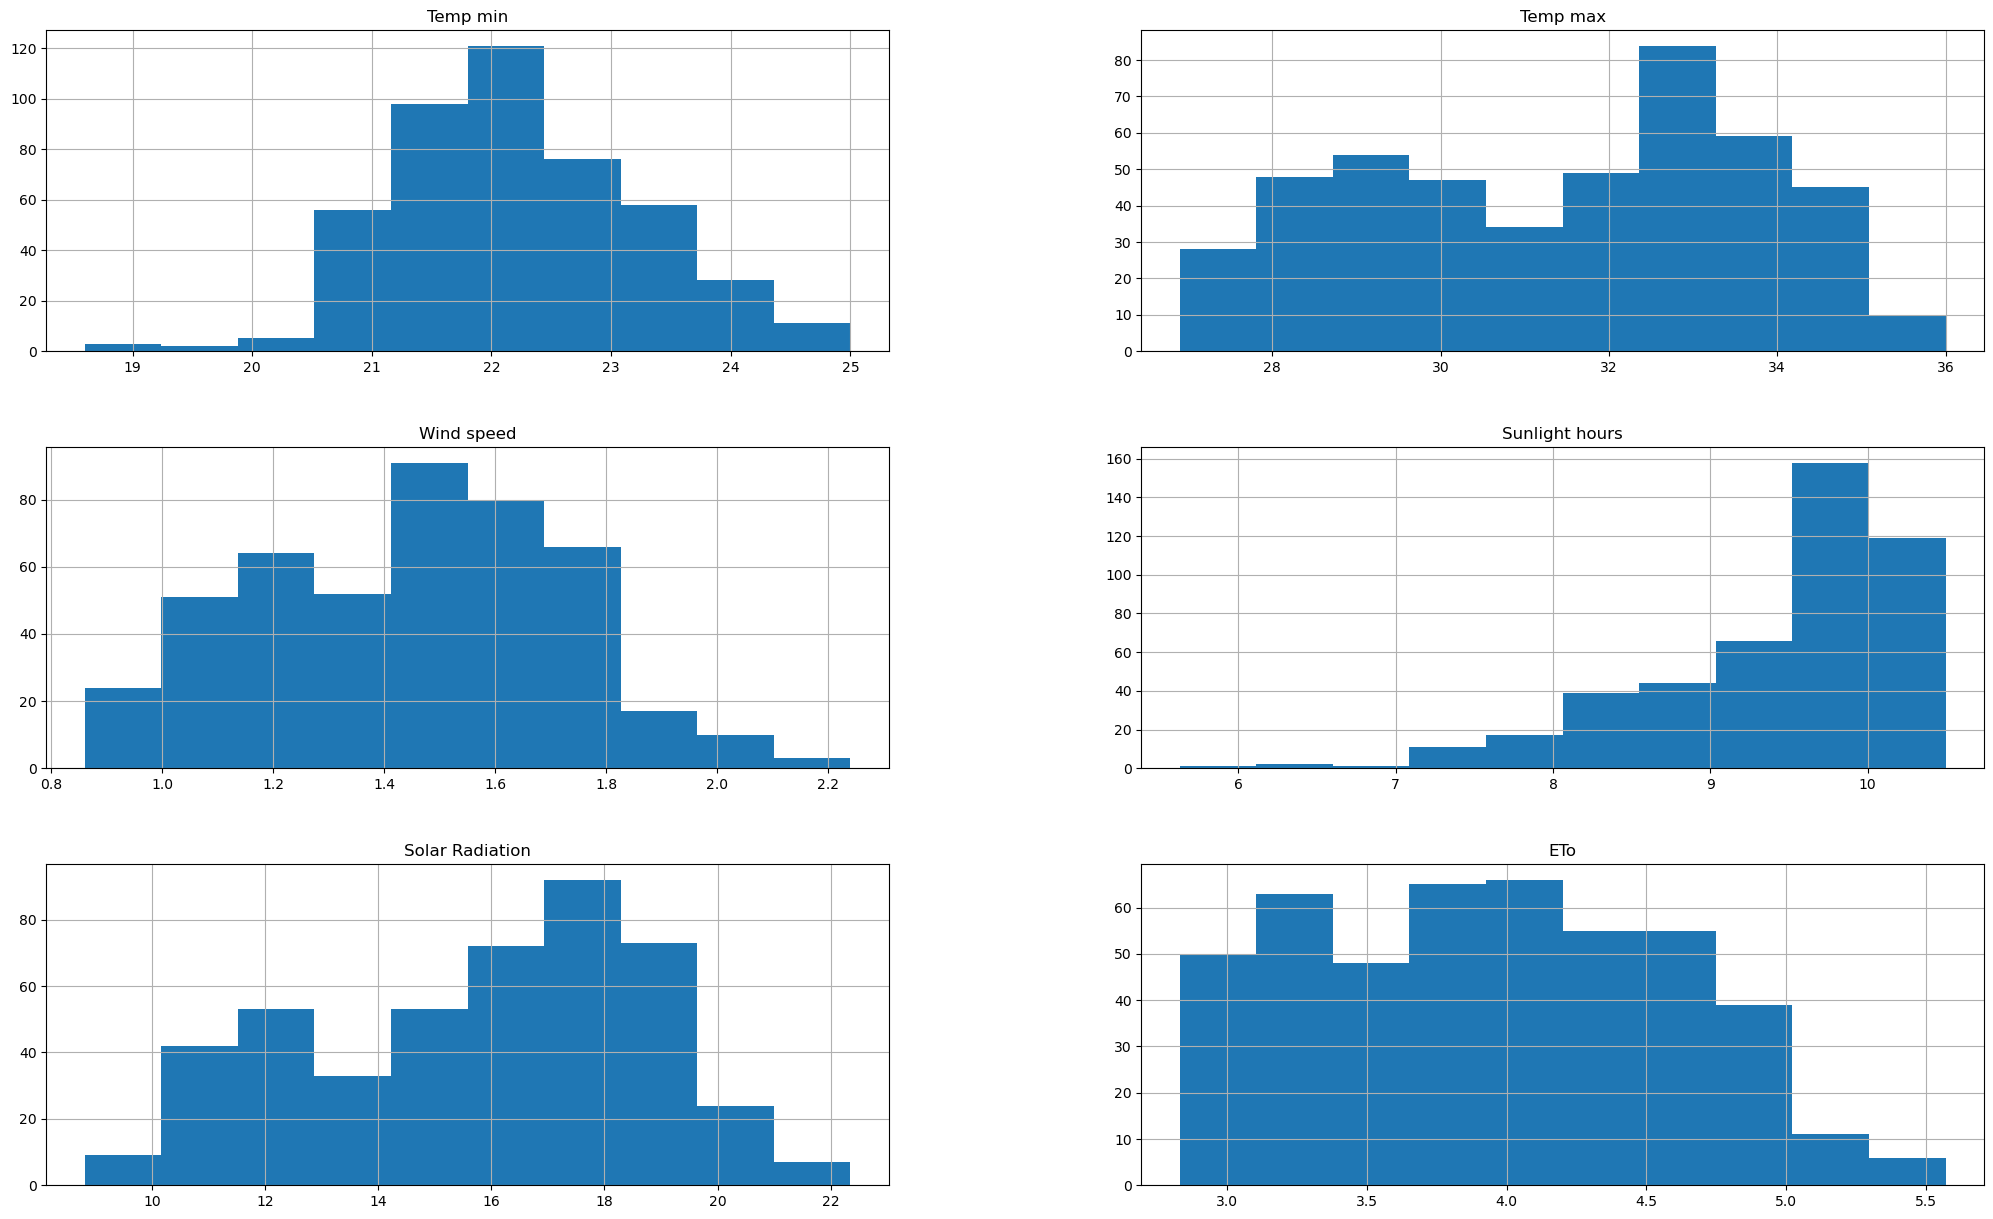

In [4]:
data.hist(figsize=(25,15))

<AxesSubplot:>

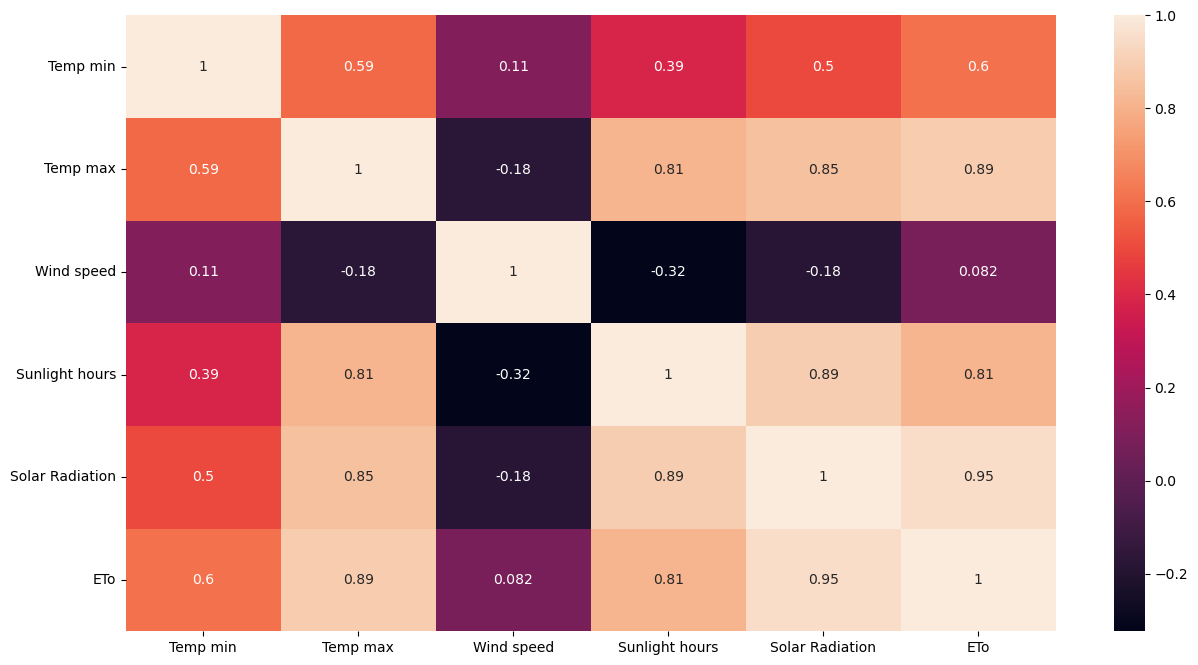

In [5]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(), annot=True, cmap="rocket")

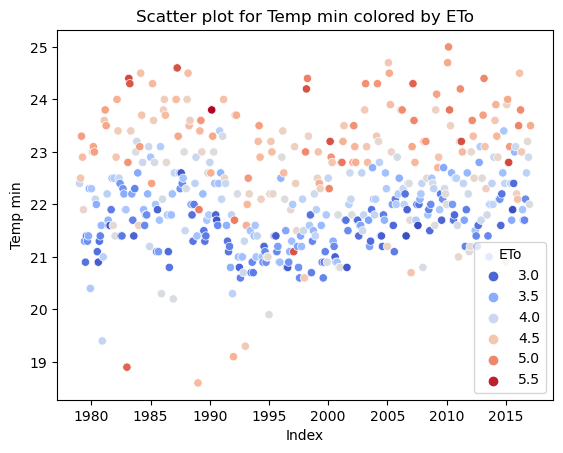

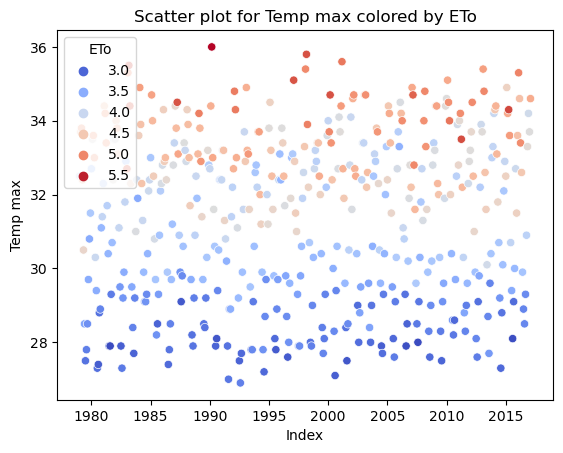

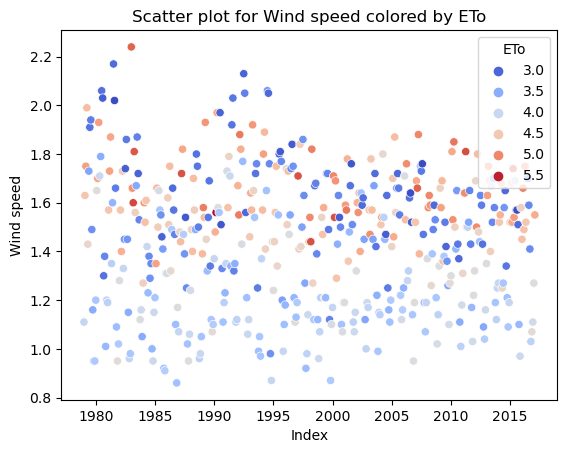

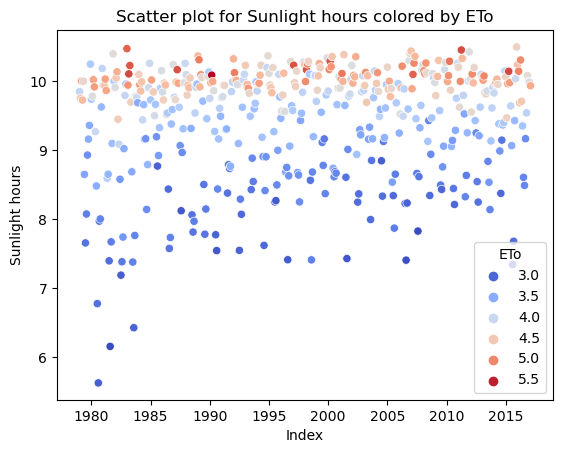

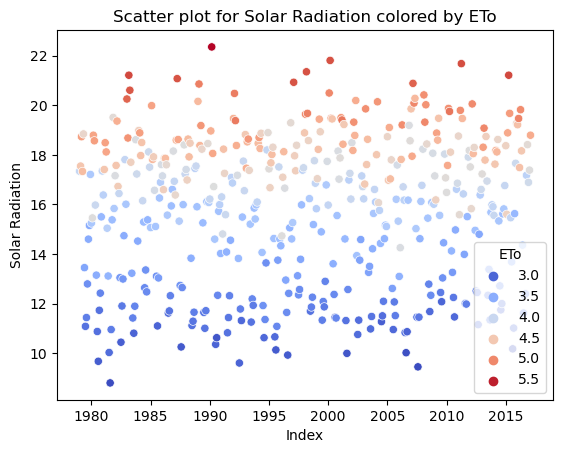

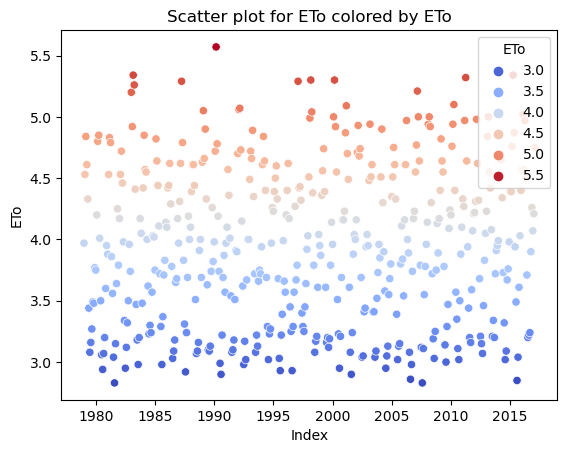

In [6]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'Date']

for feature in numerical_columns:
    sns.scatterplot(x=data.index, y=data[feature], hue=data['ETo'], palette='coolwarm')
    plt.title(f'Scatter plot for {feature} colored by ETo')
    plt.xlabel('Index')
    plt.ylabel(feature)
    plt.show()

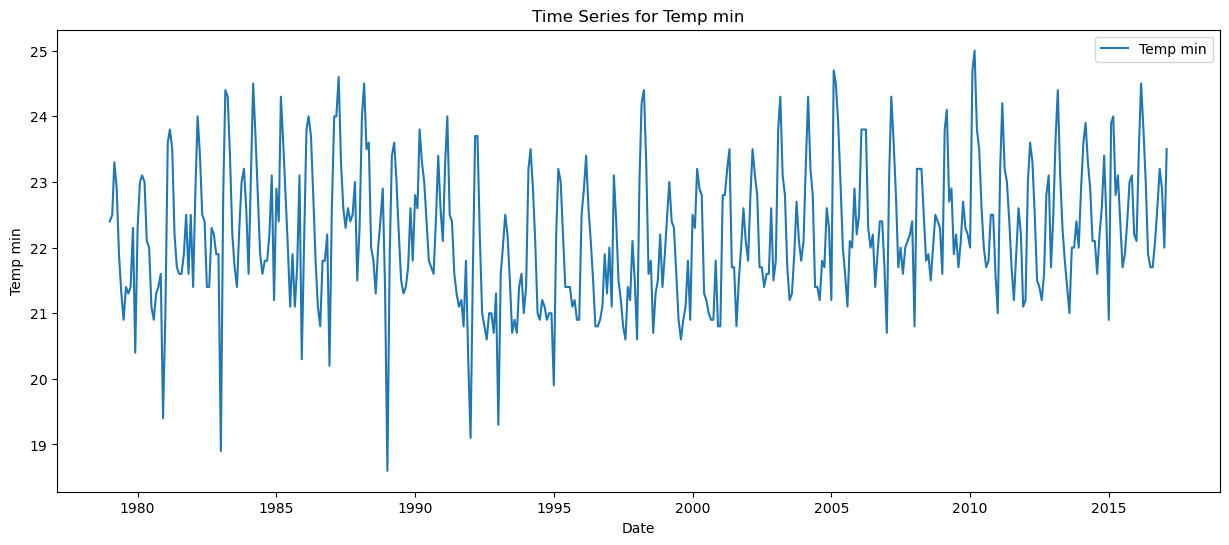

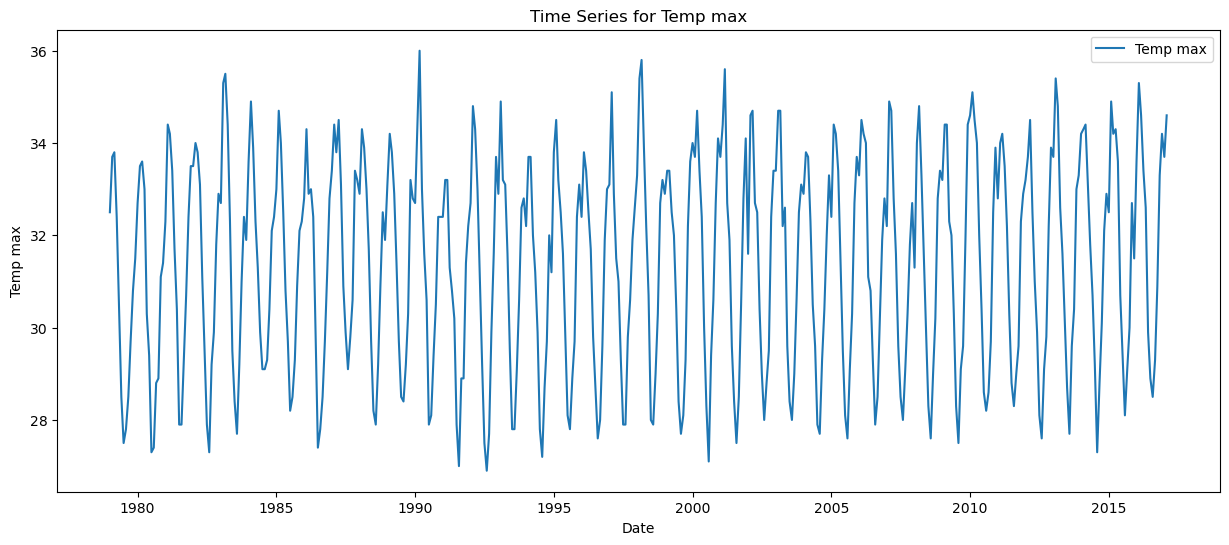

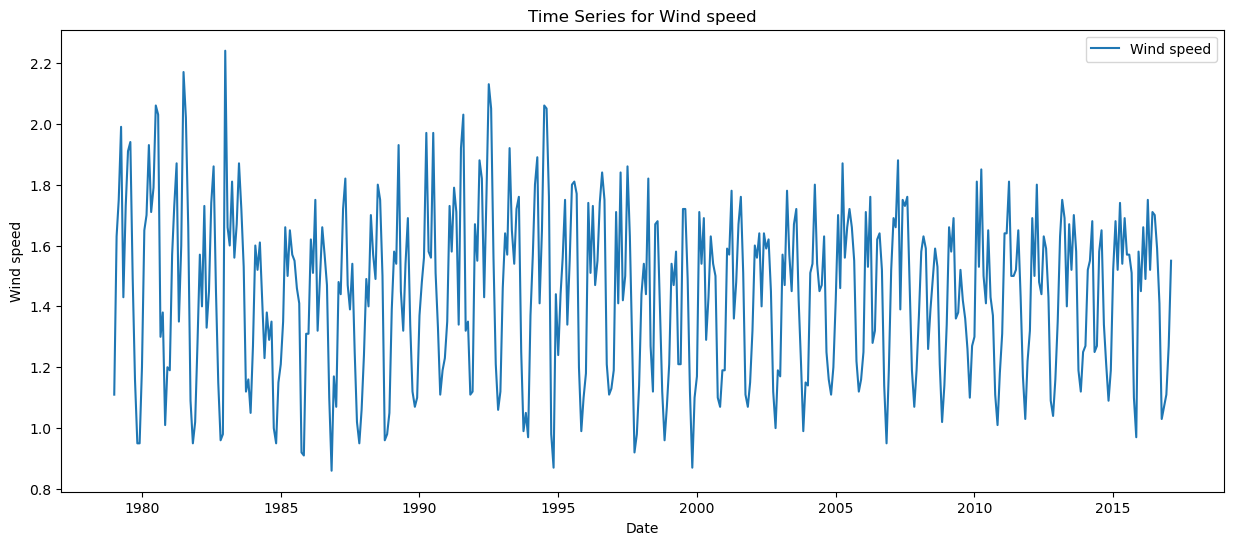

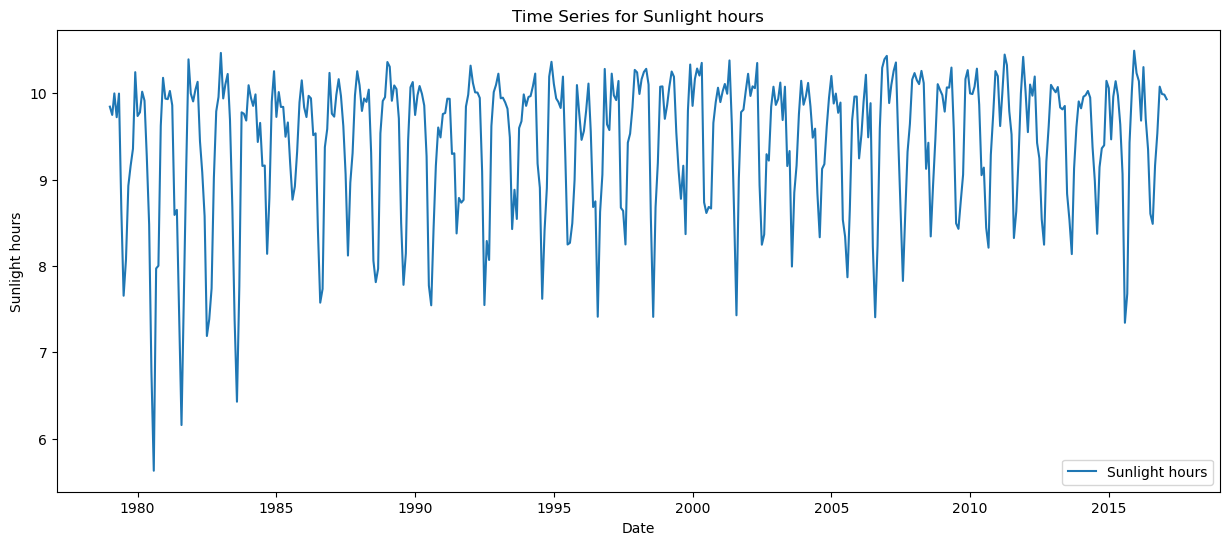

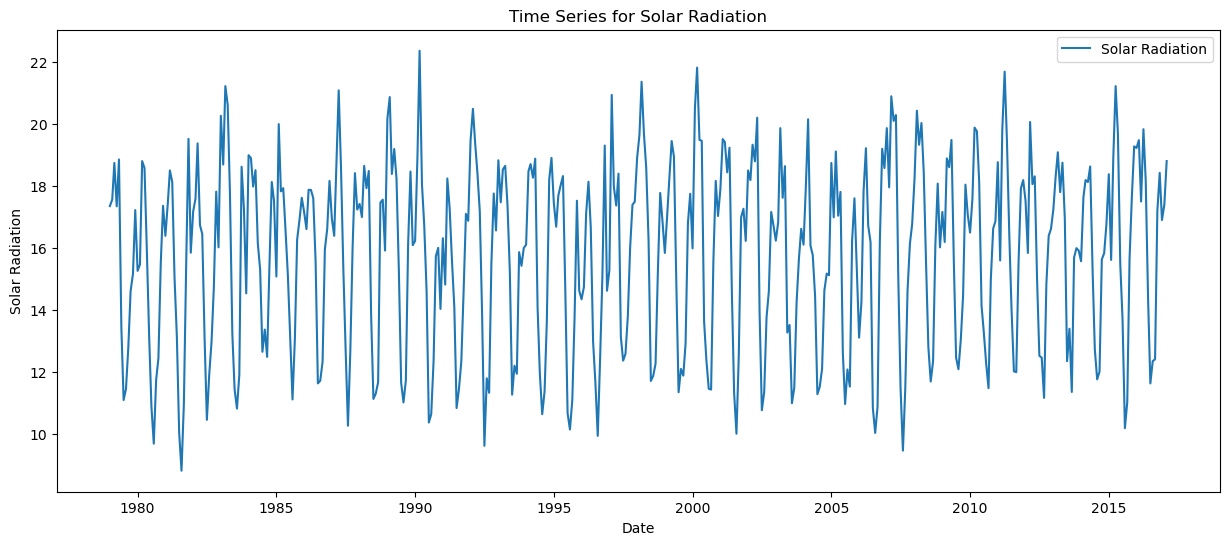

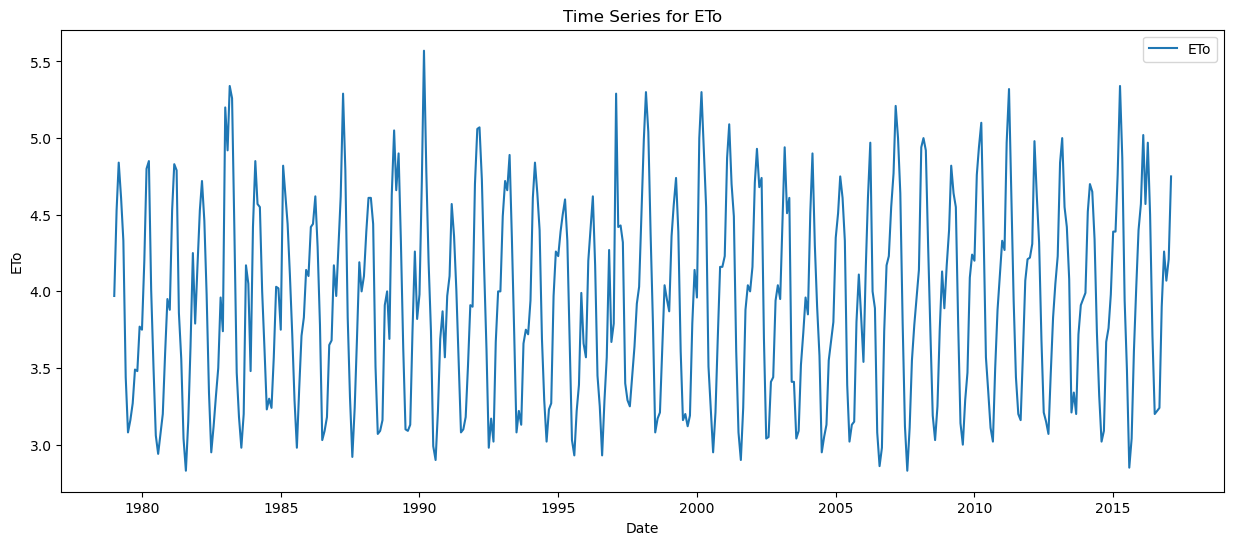

In [7]:
numerical_columns = [col for col in data.columns if data[col].dtype != 'O' and col != 'date']
for feature in numerical_columns:
    plt.figure(figsize=(15, 6))
    plt.plot(data.index, data[feature], label=feature)
    plt.title(f'Time Series for {feature}')
    plt.xlabel('Date')
    plt.ylabel(feature)
    plt.legend()
    plt.show()

In [8]:
x = data[['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_, y_train, y_ = train_test_split(x, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_, y_, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (274, 5)
the shape of the training set (target) is: (274,)

the shape of the cross validation set (input) is: (92, 5)
the shape of the cross validation set (target) is: (92,)

the shape of the test set (input) is: (92, 5)
the shape of the test set (target) is: (92,)


In [9]:
import Utils
tf.get_logger().setLevel('ERROR')
tf.autograph.set_verbosity(0)


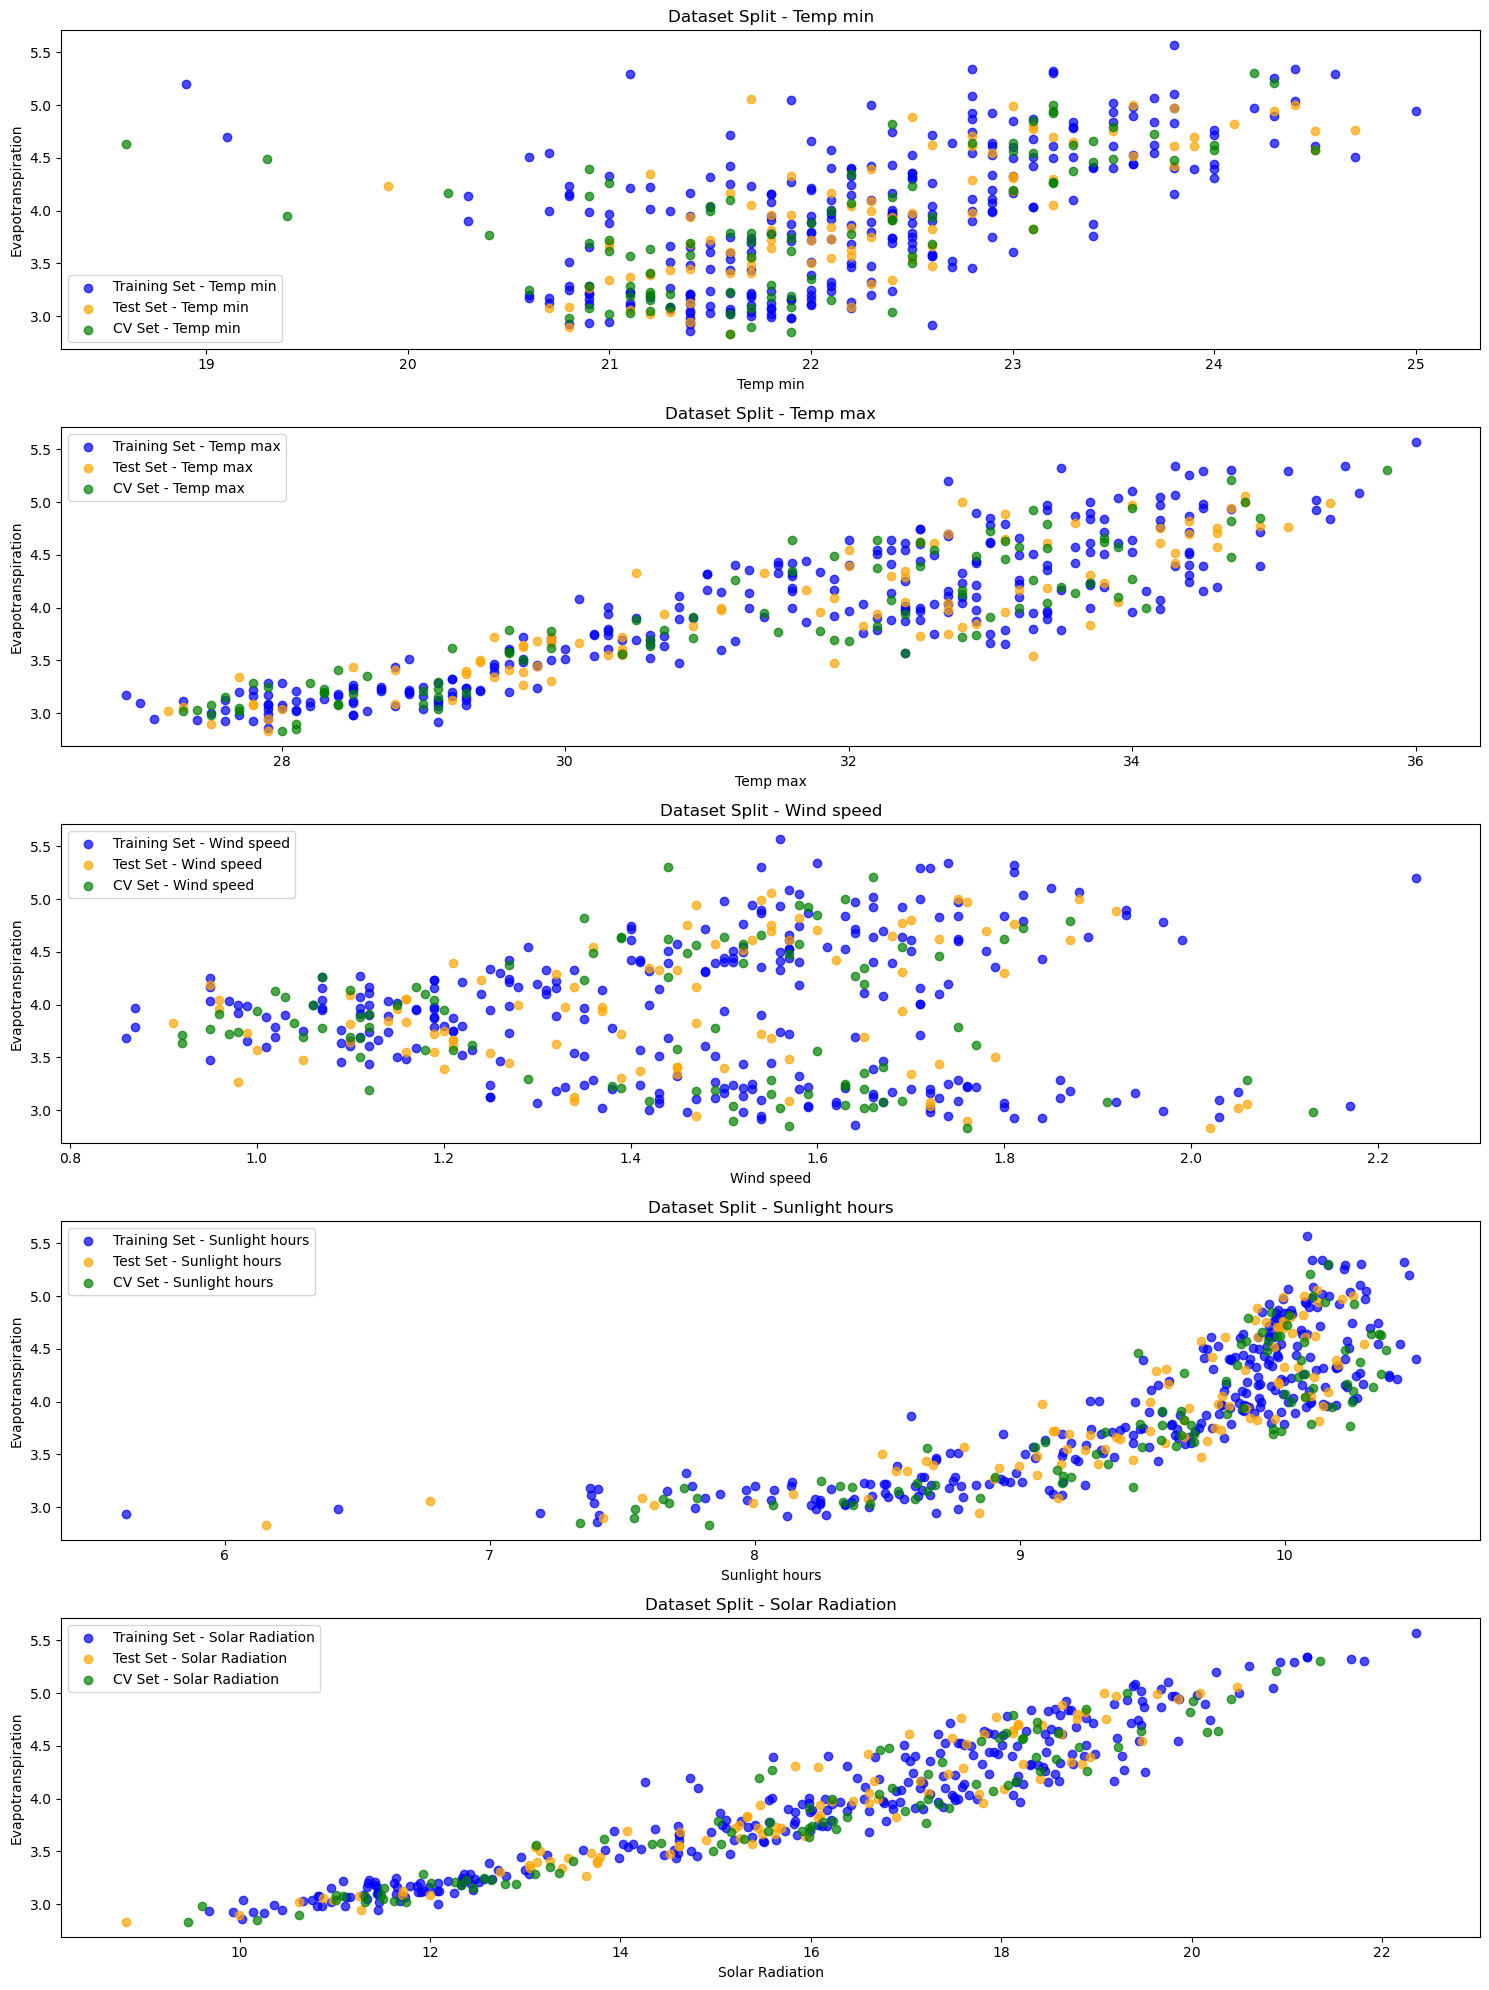

In [10]:
import numpy as np
from Utils import plot_dataset_split

features = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation'] 
plot_dataset_split(x_train, x_test, x_cv, y_train, y_test, y_cv, features)

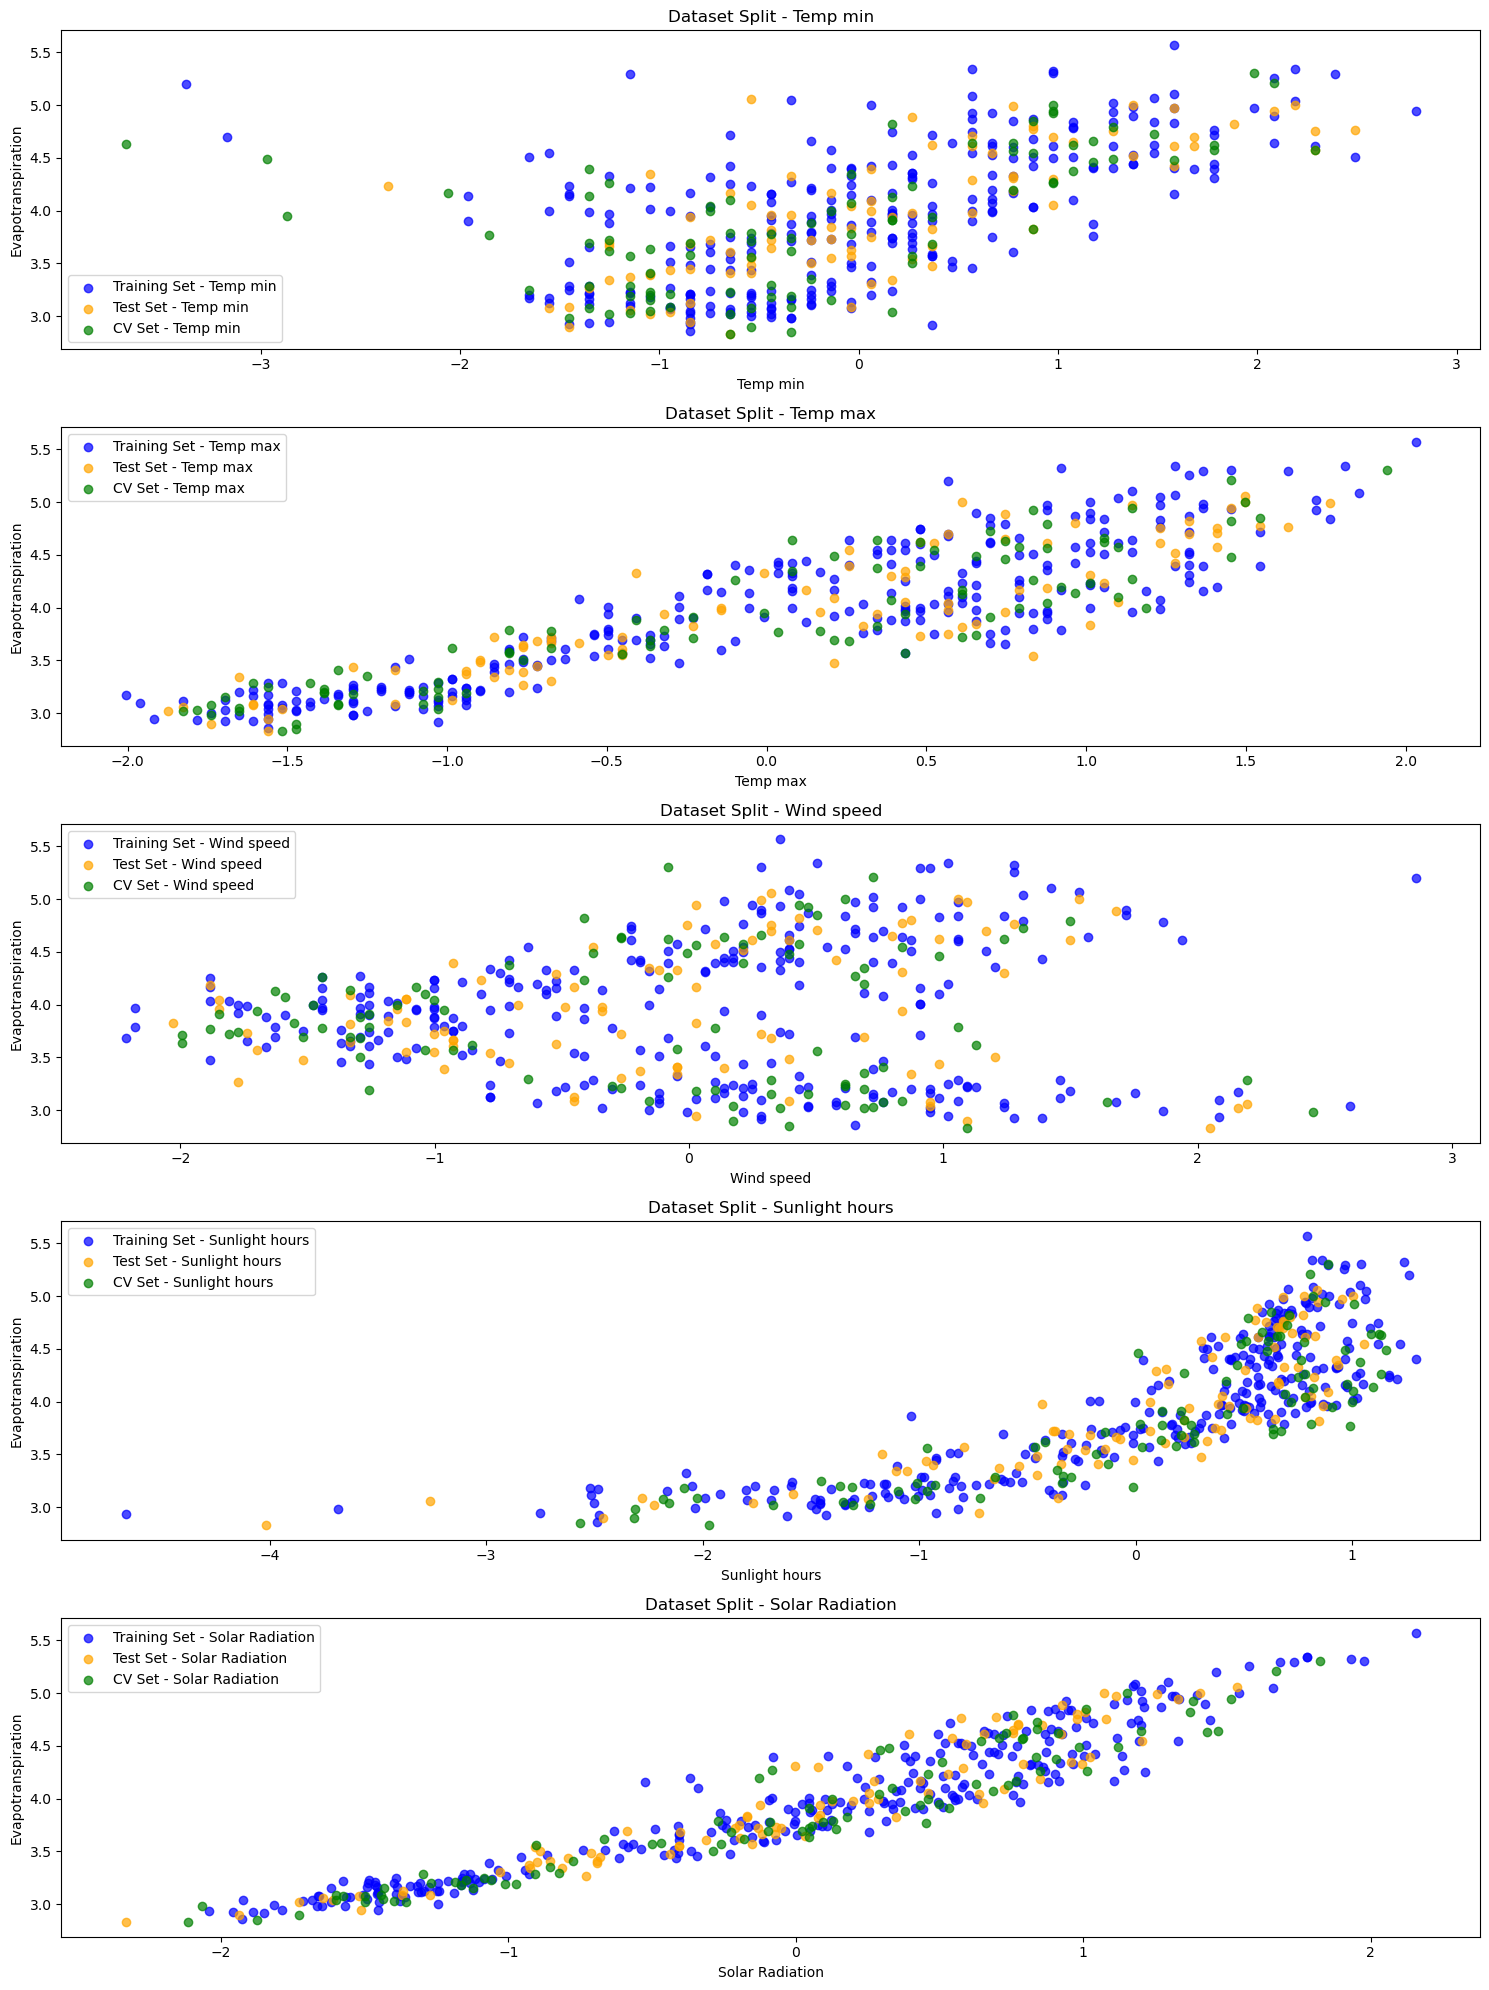

In [11]:
np.set_printoptions(precision=2)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_cv_scaled = scaler.transform(x_cv)
x_test_scaled = scaler.transform(x_test)
plot_dataset_split(x_train_scaled, x_test_scaled, x_cv_scaled, y_train, y_test, y_cv, features)

In [386]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import relu,linear
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam

lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled, y_train,
    epochs=150
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/150
9/9 [==============================] - 3s 11ms/step - loss: 18.5749 - mae: 4.2796
Epoch 2/150
9/9 [==============================] - 0s 6ms/step - loss: 17.2698 - mae: 4.1243
Epoch 3/150
9/9 [==============================] - 0s 6ms/step - loss: 16.0371 - mae: 3.9705
Epoch 4/150
9/9 [==============================] - 0s 6ms/step - loss: 14.9211 - mae: 3.8236
Epoch 5/150
9/9 [==============================] - 0s 4ms/step - loss: 13.8535 - mae: 3.6766
Epoch 6/150
9/9 [==============================] - 0s 4ms/step - loss: 12.8548 - mae: 3.5316
Epoch 7/150
9/9 [==============================] - 0s 7ms/step - loss: 11.9322 - mae: 3.3917
Epoch 8/150
9/9 [==============================] - 0s 6ms/step - loss: 11.0647 - mae: 3.2538
Epoch 9/150
9/9 [==============================] - 0s 6ms/step - loss: 10.2344 - mae: 3.1137
Epoch 10/150
9/9 [==============================] - 0s 10ms/step - loss: 9.4789 - mae: 2.9814
Epoch 11/150
9/9 [==============================] - 0s 6ms/step - lo

Epoch 89/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2760 - mae: 0.4104
Epoch 90/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2708 - mae: 0.4067
Epoch 91/150
9/9 [==============================] - 0s 14ms/step - loss: 0.2657 - mae: 0.4032
Epoch 92/150
9/9 [==============================] - 0s 8ms/step - loss: 0.2603 - mae: 0.3994
Epoch 93/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2556 - mae: 0.3962
Epoch 94/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2505 - mae: 0.3928
Epoch 95/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2463 - mae: 0.3898
Epoch 96/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2414 - mae: 0.3863
Epoch 97/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2368 - mae: 0.3829
Epoch 98/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2325 - mae: 0.3798
Epoch 99/150
9/9 [==============================] - 0s 5ms/step - los

9/9 [==============================] - 0s 5ms/step - loss: 1.6726 - mae: 1.0049
Epoch 27/150
9/9 [==============================] - 0s 4ms/step - loss: 1.5870 - mae: 0.9656
Epoch 28/150
9/9 [==============================] - 0s 7ms/step - loss: 1.5134 - mae: 0.9291
Epoch 29/150
9/9 [==============================] - 0s 7ms/step - loss: 1.4518 - mae: 0.8965
Epoch 30/150
9/9 [==============================] - 0s 9ms/step - loss: 1.3982 - mae: 0.8705
Epoch 31/150
9/9 [==============================] - 0s 6ms/step - loss: 1.3513 - mae: 0.8494
Epoch 32/150
9/9 [==============================] - 0s 5ms/step - loss: 1.3111 - mae: 0.8315
Epoch 33/150
9/9 [==============================] - 0s 6ms/step - loss: 1.2750 - mae: 0.8155
Epoch 34/150
9/9 [==============================] - 0s 6ms/step - loss: 1.2418 - mae: 0.8019
Epoch 35/150
9/9 [==============================] - 0s 6ms/step - loss: 1.2113 - mae: 0.7888
Epoch 36/150
9/9 [==============================] - 0s 7ms/step - loss: 1.1848 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.2437 - mae: 0.2948
Epoch 115/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2394 - mae: 0.2910
Epoch 116/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2352 - mae: 0.2871
Epoch 117/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2312 - mae: 0.2838
Epoch 118/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2274 - mae: 0.2803
Epoch 119/150
9/9 [==============================] - 0s 6ms/step - loss: 0.2238 - mae: 0.2770
Epoch 120/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2201 - mae: 0.2740
Epoch 121/150
9/9 [==============================] - 0s 10ms/step - loss: 0.2167 - mae: 0.2709
Epoch 122/150
9/9 [==============================] - 0s 8ms/step - loss: 0.2131 - mae: 0.2678
Epoch 123/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2099 - mae: 0.2650
Epoch 124/150
9/9 [==============================] - 0s 5ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 0.7239 - mae: 0.5154
Epoch 52/150
9/9 [==============================] - 0s 4ms/step - loss: 0.7079 - mae: 0.5076
Epoch 53/150
9/9 [==============================] - 0s 6ms/step - loss: 0.6936 - mae: 0.5000
Epoch 54/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6793 - mae: 0.4926
Epoch 55/150
9/9 [==============================] - 0s 12ms/step - loss: 0.6657 - mae: 0.4858
Epoch 56/150
9/9 [==============================] - 0s 8ms/step - loss: 0.6525 - mae: 0.4791
Epoch 57/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6400 - mae: 0.4732
Epoch 58/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6277 - mae: 0.4670
Epoch 59/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6155 - mae: 0.4607
Epoch 60/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6036 - mae: 0.4547
Epoch 61/150
9/9 [==============================] - 0s 5ms/step - loss: 0.5928 - m

9/9 [==============================] - 0s 6ms/step - loss: 0.1788 - mae: 0.1689
Epoch 139/150
9/9 [==============================] - 0s 5ms/step - loss: 0.1764 - mae: 0.1666
Epoch 140/150
9/9 [==============================] - 0s 6ms/step - loss: 0.1742 - mae: 0.1647
Epoch 141/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1719 - mae: 0.1628
Epoch 142/150
9/9 [==============================] - 0s 9ms/step - loss: 0.1696 - mae: 0.1609
Epoch 143/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1673 - mae: 0.1586
Epoch 144/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1651 - mae: 0.1566
Epoch 145/150
9/9 [==============================] - 0s 7ms/step - loss: 0.1631 - mae: 0.1546
Epoch 146/150
9/9 [==============================] - 0s 9ms/step - loss: 0.1609 - mae: 0.1527
Epoch 147/150
9/9 [==============================] - 0s 8ms/step - loss: 0.1588 - mae: 0.1512
Epoch 148/150
9/9 [==============================] - 0s 9ms/step - loss: 0

9/9 [==============================] - 0s 14ms/step - loss: 0.7623 - mae: 0.4168
Epoch 76/150
9/9 [==============================] - 0s 4ms/step - loss: 0.7457 - mae: 0.4099
Epoch 77/150
9/9 [==============================] - 0s 6ms/step - loss: 0.7296 - mae: 0.4033
Epoch 78/150
9/9 [==============================] - 0s 5ms/step - loss: 0.7140 - mae: 0.3969
Epoch 79/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6976 - mae: 0.3900
Epoch 80/150
9/9 [==============================] - 0s 6ms/step - loss: 0.6825 - mae: 0.3839
Epoch 81/150
9/9 [==============================] - 0s 6ms/step - loss: 0.6672 - mae: 0.3773
Epoch 82/150
9/9 [==============================] - 0s 6ms/step - loss: 0.6519 - mae: 0.3709
Epoch 83/150
9/9 [==============================] - 0s 7ms/step - loss: 0.6369 - mae: 0.3644
Epoch 84/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6225 - mae: 0.3577
Epoch 85/150
9/9 [==============================] - 0s 5ms/step - loss: 0.6085 - m

9/9 [==============================] - 0s 5ms/step - loss: 8.5221 - mae: 2.5633
Epoch 13/150
9/9 [==============================] - 0s 5ms/step - loss: 7.8919 - mae: 2.4297
Epoch 14/150
9/9 [==============================] - 0s 6ms/step - loss: 7.2966 - mae: 2.2953
Epoch 15/150
9/9 [==============================] - 0s 6ms/step - loss: 6.7448 - mae: 2.1634
Epoch 16/150
9/9 [==============================] - 0s 9ms/step - loss: 6.2421 - mae: 2.0322
Epoch 17/150
9/9 [==============================] - 0s 6ms/step - loss: 5.7836 - mae: 1.9043
Epoch 18/150
9/9 [==============================] - 0s 6ms/step - loss: 5.3695 - mae: 1.7857
Epoch 19/150
9/9 [==============================] - 0s 9ms/step - loss: 4.9986 - mae: 1.6721
Epoch 20/150
9/9 [==============================] - 0s 8ms/step - loss: 4.6693 - mae: 1.5652
Epoch 21/150
9/9 [==============================] - 0s 5ms/step - loss: 4.3875 - mae: 1.4718
Epoch 22/150
9/9 [==============================] - 0s 6ms/step - loss: 4.1310 - ma

9/9 [==============================] - 0s 7ms/step - loss: 0.3130 - mae: 0.1577
Epoch 101/150
9/9 [==============================] - 0s 11ms/step - loss: 0.3032 - mae: 0.1535
Epoch 102/150
9/9 [==============================] - 0s 9ms/step - loss: 0.2939 - mae: 0.1500
Epoch 103/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2848 - mae: 0.1461
Epoch 104/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2761 - mae: 0.1429
Epoch 105/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2676 - mae: 0.1393
Epoch 106/150
9/9 [==============================] - 0s 4ms/step - loss: 0.2595 - mae: 0.1363
Epoch 107/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2515 - mae: 0.1333
Epoch 108/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2440 - mae: 0.1307
Epoch 109/150
9/9 [==============================] - 0s 5ms/step - loss: 0.2365 - mae: 0.1278
Epoch 110/150
9/9 [==============================] - 0s 4ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 2.9108 - mae: 0.7933
Epoch 38/150
9/9 [==============================] - 0s 9ms/step - loss: 2.8013 - mae: 0.7734
Epoch 39/150
9/9 [==============================] - 0s 12ms/step - loss: 2.6933 - mae: 0.7536
Epoch 40/150
9/9 [==============================] - 0s 6ms/step - loss: 2.5921 - mae: 0.7347
Epoch 41/150
9/9 [==============================] - 0s 6ms/step - loss: 2.4896 - mae: 0.7145
Epoch 42/150
9/9 [==============================] - 0s 8ms/step - loss: 2.3907 - mae: 0.6946
Epoch 43/150
9/9 [==============================] - 0s 6ms/step - loss: 2.2947 - mae: 0.6752
Epoch 44/150
9/9 [==============================] - 0s 5ms/step - loss: 2.2008 - mae: 0.6564
Epoch 45/150
9/9 [==============================] - 0s 4ms/step - loss: 2.1107 - mae: 0.6390
Epoch 46/150
9/9 [==============================] - 0s 4ms/step - loss: 2.0201 - mae: 0.6199
Epoch 47/150
9/9 [==============================] - 0s 4ms/step - loss: 1.9336 - m

9/9 [==============================] - 0s 9ms/step - loss: 0.0514 - mae: 0.0648
Epoch 125/150
9/9 [==============================] - 0s 7ms/step - loss: 0.0496 - mae: 0.0644
Epoch 126/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0479 - mae: 0.0639
Epoch 127/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0463 - mae: 0.0640
Epoch 128/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0447 - mae: 0.0638
Epoch 129/150
9/9 [==============================] - 0s 7ms/step - loss: 0.0433 - mae: 0.0631
Epoch 130/150
9/9 [==============================] - 0s 8ms/step - loss: 0.0420 - mae: 0.0629
Epoch 131/150
9/9 [==============================] - 0s 7ms/step - loss: 0.0407 - mae: 0.0623
Epoch 132/150
9/9 [==============================] - 0s 9ms/step - loss: 0.0395 - mae: 0.0623
Epoch 133/150
9/9 [==============================] - 0s 7ms/step - loss: 0.0383 - mae: 0.0623
Epoch 134/150
9/9 [==============================] - 0s 6ms/step - loss: 0

In [387]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 8ms/step
RESULTS:
Model 1: Training MSE: 0.05, CV MSE: 0.05
Model 2: Training MSE: 0.03, CV MSE: 0.03
Model 3: Training MSE: 0.02, CV MSE: 0.02
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.00, CV MSE: 0.00
Model 6: Training MSE: 0.00, CV MSE: 0.00


In [393]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 4ms/step
Selected Model: 5
Training MSE: 0.00
Cross Validation MSE: 0.00
Test MSE: 0.00


In [394]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)



Actual Values  Predicted Values
0           3.83          3.893024
1           3.83          3.915586
2           3.49          3.460765
3           3.63          3.703621
4           3.72          3.713145
5           4.62          4.597903
6           4.65          4.630640

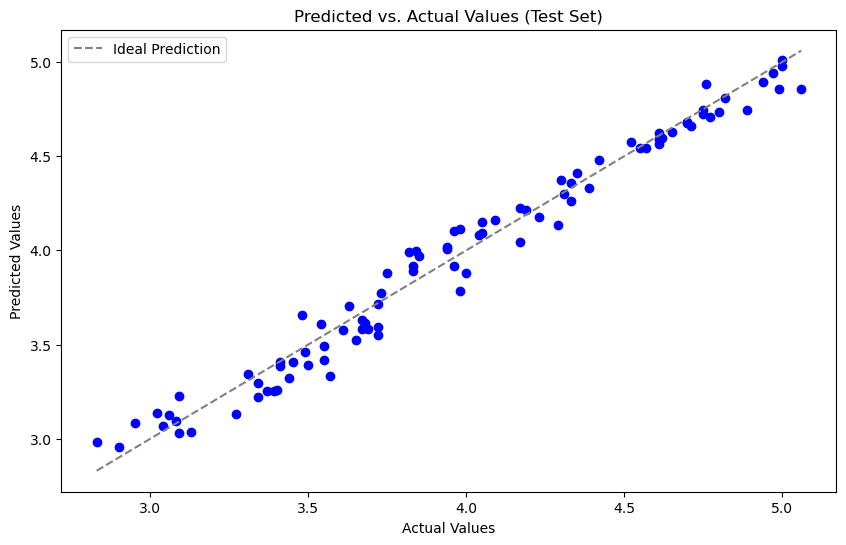

In [395]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [396]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.09455039829969489
RAE: 0.1538081888491275
MAE: 0.07795625582985258
R2: 0.9747775999751689


In [228]:
x_reduced = data[['Temp min', 'Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced, x_reduced, y_train, y_ = train_test_split(x_reduced, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced, x_test_reduced, y_cv, y_test = train_test_split(x_reduced, y_, test_size=0.50, random_state=1)


In [230]:
scaler = StandardScaler()
x_train_scaled_reduced = scaler.fit_transform(x_train_reduced)
x_cv_scaled__reduced = scaler.transform(x_cv_reduced)
x_test_scaled_reduced = scaler.transform(x_test_reduced)

In [252]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 17.0615 - mae: 4.0441
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 16.0087 - mae: 3.9162
Epoch 3/300
9/9 [==============================] - 0s 10ms/step - loss: 15.0494 - mae: 3.7937
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 14.1286 - mae: 3.6729
Epoch 5/300
9/9 [==============================] - 0s 6ms/step - loss: 13.2811 - mae: 3.5563
Epoch 6/300
9/9 [==============================] - 0s 5ms/step - loss: 12.4891 - mae: 3.4431
Epoch 7/300
9/9 [==============================] - 0s 5ms/step - loss: 11.7543 - mae: 3.3335
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 11.0555 - mae: 3.2263
Epoch 9/300
9/9 [==============================] - 0s 5ms/step - loss: 10.3991 - mae: 3.1202
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 9.7620 - mae: 3.0142
Epoch 11/300
9/9 [==============================] - 0s 5ms/step - los

9/9 [==============================] - 0s 3ms/step - loss: 0.2279 - mae: 0.3770
Epoch 90/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2214 - mae: 0.3716
Epoch 91/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2157 - mae: 0.3663
Epoch 92/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2095 - mae: 0.3610
Epoch 93/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2038 - mae: 0.3557
Epoch 94/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1980 - mae: 0.3503
Epoch 95/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1925 - mae: 0.3452
Epoch 96/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1873 - mae: 0.3403
Epoch 97/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1820 - mae: 0.3354
Epoch 98/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1771 - mae: 0.3308
Epoch 99/300
9/9 [==============================] - 0s 8ms/step - loss: 0.1725 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0435 - mae: 0.1627
Epoch 177/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0431 - mae: 0.1621
Epoch 178/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0427 - mae: 0.1612
Epoch 179/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0423 - mae: 0.1604
Epoch 180/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0420 - mae: 0.1598
Epoch 181/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0415 - mae: 0.1592
Epoch 182/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0412 - mae: 0.1586
Epoch 183/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0407 - mae: 0.1575
Epoch 184/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0407 - mae: 0.1577
Epoch 185/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0404 - mae: 0.1570
Epoch 186/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0258 - mae: 0.1267
Epoch 264/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0256 - mae: 0.1264
Epoch 265/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0255 - mae: 0.1260
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0255 - mae: 0.1258
Epoch 267/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0253 - mae: 0.1254
Epoch 268/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0252 - mae: 0.1254
Epoch 269/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0251 - mae: 0.1251
Epoch 270/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0250 - mae: 0.1248
Epoch 271/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0249 - mae: 0.1246
Epoch 272/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0249 - mae: 0.1248
Epoch 273/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.4427 - mae: 0.4879
Epoch 51/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4228 - mae: 0.4735
Epoch 52/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4054 - mae: 0.4613
Epoch 53/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3858 - mae: 0.4469
Epoch 54/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3693 - mae: 0.4337
Epoch 55/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3538 - mae: 0.4220
Epoch 56/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3398 - mae: 0.4101
Epoch 57/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3258 - mae: 0.3991
Epoch 58/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3131 - mae: 0.3890
Epoch 59/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3020 - mae: 0.3800
Epoch 60/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2901 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0831 - mae: 0.1342
Epoch 138/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0826 - mae: 0.1336
Epoch 139/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0822 - mae: 0.1327
Epoch 140/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0817 - mae: 0.1319
Epoch 141/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0811 - mae: 0.1313
Epoch 142/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0806 - mae: 0.1307
Epoch 143/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0802 - mae: 0.1303
Epoch 144/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0797 - mae: 0.1297
Epoch 145/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0793 - mae: 0.1291
Epoch 146/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0788 - mae: 0.1284
Epoch 147/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0566 - mae: 0.1065
Epoch 225/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0564 - mae: 0.1062
Epoch 226/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0562 - mae: 0.1059
Epoch 227/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0559 - mae: 0.1060
Epoch 228/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0558 - mae: 0.1063
Epoch 229/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0556 - mae: 0.1060
Epoch 230/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0553 - mae: 0.1056
Epoch 231/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0551 - mae: 0.1056
Epoch 232/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0550 - mae: 0.1055
Epoch 233/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0547 - mae: 0.1051
Epoch 234/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 6.8464 - mae: 2.3006
Epoch 12/300
9/9 [==============================] - 0s 5ms/step - loss: 6.2617 - mae: 2.1882
Epoch 13/300
9/9 [==============================] - 0s 3ms/step - loss: 5.7133 - mae: 2.0811
Epoch 14/300
9/9 [==============================] - 0s 3ms/step - loss: 5.1805 - mae: 1.9726
Epoch 15/300
9/9 [==============================] - 0s 4ms/step - loss: 4.6838 - mae: 1.8701
Epoch 16/300
9/9 [==============================] - 0s 5ms/step - loss: 4.2261 - mae: 1.7664
Epoch 17/300
9/9 [==============================] - 0s 3ms/step - loss: 3.8116 - mae: 1.6685
Epoch 18/300
9/9 [==============================] - 0s 4ms/step - loss: 3.4282 - mae: 1.5705
Epoch 19/300
9/9 [==============================] - 0s 3ms/step - loss: 3.0900 - mae: 1.4752
Epoch 20/300
9/9 [==============================] - 0s 4ms/step - loss: 2.7967 - mae: 1.3845
Epoch 21/300
9/9 [==============================] - 0s 3ms/step - loss: 2.5348 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.2207 - mae: 0.2175
Epoch 100/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2166 - mae: 0.2142
Epoch 101/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2130 - mae: 0.2110
Epoch 102/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2094 - mae: 0.2080
Epoch 103/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2059 - mae: 0.2049
Epoch 104/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2026 - mae: 0.2022
Epoch 105/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1993 - mae: 0.1994
Epoch 106/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1962 - mae: 0.1970
Epoch 107/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1933 - mae: 0.1950
Epoch 108/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1902 - mae: 0.1921
Epoch 109/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0826 - mae: 0.1211
Epoch 187/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0821 - mae: 0.1211
Epoch 188/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0811 - mae: 0.1203
Epoch 189/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0804 - mae: 0.1206
Epoch 190/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0796 - mae: 0.1197
Epoch 191/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0790 - mae: 0.1197
Epoch 192/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0782 - mae: 0.1192
Epoch 193/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0775 - mae: 0.1189
Epoch 194/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0769 - mae: 0.1186
Epoch 195/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0761 - mae: 0.1180
Epoch 196/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0420 - mae: 0.1034
Epoch 274/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0418 - mae: 0.1037
Epoch 275/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0416 - mae: 0.1039
Epoch 276/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0414 - mae: 0.1040
Epoch 277/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0411 - mae: 0.1041
Epoch 278/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0409 - mae: 0.1040
Epoch 279/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0407 - mae: 0.1039
Epoch 280/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0405 - mae: 0.1038
Epoch 281/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0403 - mae: 0.1039
Epoch 282/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0400 - mae: 0.1037
Epoch 283/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 1.0248 - mae: 0.5463
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.9945 - mae: 0.5332
Epoch 62/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9652 - mae: 0.5208
Epoch 63/300
9/9 [==============================] - 0s 4ms/step - loss: 0.9366 - mae: 0.5079
Epoch 64/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9097 - mae: 0.4955
Epoch 65/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8811 - mae: 0.4819
Epoch 66/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8552 - mae: 0.4697
Epoch 67/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8290 - mae: 0.4568
Epoch 68/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8034 - mae: 0.4441
Epoch 69/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7786 - mae: 0.4313
Epoch 70/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7547 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.1481 - mae: 0.1372
Epoch 148/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1457 - mae: 0.1366
Epoch 149/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1434 - mae: 0.1364
Epoch 150/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1412 - mae: 0.1361
Epoch 151/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1390 - mae: 0.1358
Epoch 152/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1369 - mae: 0.1357
Epoch 153/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1348 - mae: 0.1354
Epoch 154/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1327 - mae: 0.1351
Epoch 155/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1306 - mae: 0.1349
Epoch 156/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1286 - mae: 0.1345
Epoch 157/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0497 - mae: 0.1263
Epoch 235/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0494 - mae: 0.1261
Epoch 236/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0487 - mae: 0.1251
Epoch 237/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0484 - mae: 0.1253
Epoch 238/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0478 - mae: 0.1248
Epoch 239/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0475 - mae: 0.1251
Epoch 240/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0471 - mae: 0.1254
Epoch 241/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0466 - mae: 0.1253
Epoch 242/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0463 - mae: 0.1255
Epoch 243/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0459 - mae: 0.1249
Epoch 244/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 4.1150 - mae: 1.4165
Epoch 22/300
9/9 [==============================] - 0s 4ms/step - loss: 3.8710 - mae: 1.3382
Epoch 23/300
9/9 [==============================] - 0s 4ms/step - loss: 3.6481 - mae: 1.2684
Epoch 24/300
9/9 [==============================] - 0s 4ms/step - loss: 3.4576 - mae: 1.2090
Epoch 25/300
9/9 [==============================] - 0s 4ms/step - loss: 3.2897 - mae: 1.1549
Epoch 26/300
9/9 [==============================] - 0s 5ms/step - loss: 3.1385 - mae: 1.1059
Epoch 27/300
9/9 [==============================] - 0s 4ms/step - loss: 3.0049 - mae: 1.0601
Epoch 28/300
9/9 [==============================] - 0s 5ms/step - loss: 2.8768 - mae: 1.0182
Epoch 29/300
9/9 [==============================] - 0s 5ms/step - loss: 2.7606 - mae: 0.9788
Epoch 30/300
9/9 [==============================] - 0s 5ms/step - loss: 2.6546 - mae: 0.9427
Epoch 31/300
9/9 [==============================] - 0s 4ms/step - loss: 2.5532 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.1557 - mae: 0.1198
Epoch 110/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1518 - mae: 0.1193
Epoch 111/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1480 - mae: 0.1191
Epoch 112/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1444 - mae: 0.1194
Epoch 113/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1409 - mae: 0.1191
Epoch 114/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1375 - mae: 0.1190
Epoch 115/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1343 - mae: 0.1191
Epoch 116/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1310 - mae: 0.1190
Epoch 117/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1281 - mae: 0.1198
Epoch 118/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1251 - mae: 0.1195
Epoch 119/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0421 - mae: 0.1260
Epoch 197/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0418 - mae: 0.1255
Epoch 198/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0417 - mae: 0.1255
Epoch 199/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0416 - mae: 0.1260
Epoch 200/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0414 - mae: 0.1259
Epoch 201/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0414 - mae: 0.1267
Epoch 202/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0412 - mae: 0.1263
Epoch 203/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0410 - mae: 0.1264
Epoch 204/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0409 - mae: 0.1262
Epoch 205/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0408 - mae: 0.1264
Epoch 206/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0382 - mae: 0.1294
Epoch 284/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0381 - mae: 0.1287
Epoch 285/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0381 - mae: 0.1281
Epoch 286/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0381 - mae: 0.1280
Epoch 287/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0381 - mae: 0.1281
Epoch 288/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0380 - mae: 0.1280
Epoch 289/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0380 - mae: 0.1283
Epoch 290/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0380 - mae: 0.1284
Epoch 291/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0380 - mae: 0.1283
Epoch 292/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0381 - mae: 0.1281
Epoch 293/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.5214 - mae: 0.2112
Epoch 71/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4995 - mae: 0.2042
Epoch 72/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4790 - mae: 0.1983
Epoch 73/300
9/9 [==============================] - 0s 5ms/step - loss: 0.4595 - mae: 0.1925
Epoch 74/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4409 - mae: 0.1870
Epoch 75/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4233 - mae: 0.1825
Epoch 76/300
9/9 [==============================] - 0s 4ms/step - loss: 0.4066 - mae: 0.1783
Epoch 77/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3907 - mae: 0.1748
Epoch 78/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3755 - mae: 0.1707
Epoch 79/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3612 - mae: 0.1672
Epoch 80/300
9/9 [==============================] - 0s 5ms/step - loss: 0.3475 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0544 - mae: 0.1364
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0539 - mae: 0.1365
Epoch 159/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0536 - mae: 0.1365
Epoch 160/300
9/9 [==============================] - 0s 11ms/step - loss: 0.0530 - mae: 0.1360
Epoch 161/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0527 - mae: 0.1368
Epoch 162/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0523 - mae: 0.1364
Epoch 163/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0519 - mae: 0.1360
Epoch 164/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0515 - mae: 0.1363
Epoch 165/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0513 - mae: 0.1374
Epoch 166/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0508 - mae: 0.1364
Epoch 167/300
9/9 [==============================] - 0s 4ms/step - loss: 

9/9 [==============================] - 0s 4ms/step - loss: 0.0445 - mae: 0.1366
Epoch 245/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.1360
Epoch 246/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0445 - mae: 0.1361
Epoch 247/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.1360
Epoch 248/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0446 - mae: 0.1367
Epoch 249/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0445 - mae: 0.1367
Epoch 250/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0445 - mae: 0.1365
Epoch 251/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.1361
Epoch 252/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0444 - mae: 0.1356
Epoch 253/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0446 - mae: 0.1358
Epoch 254/300
9/9 [==============================] - 0s 4ms/step - loss: 0

In [253]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 4ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.02
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.01, CV MSE: 0.01


In [254]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 2ms/step
Selected Model: 5
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [255]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.83          3.852209
1           3.83          4.206795
2           3.49          3.440879
3           3.63          3.714301
4           3.72          3.646329
5           4.62          4.378722
6           4.65          4.478147

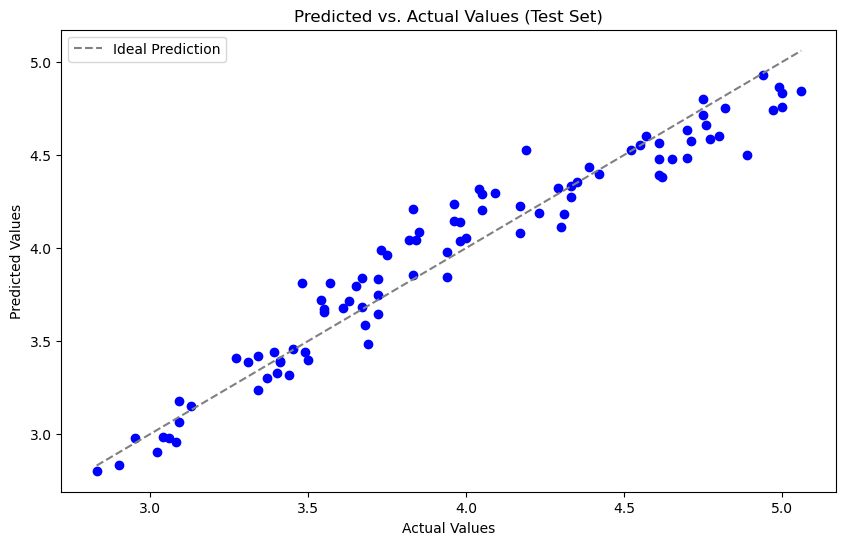

In [256]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [257]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15109285075013976
RAE: 0.2376075932967302
MAE: 0.1204292077603548
R2: 0.9355908578979


In [260]:
x_reduced2 = data[['Temp max', 'Sunlight hours','Solar Radiation']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced2, x_reduced2, y_train, y_ = train_test_split(x_reduced2, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced2, x_test_reduced2, y_cv, y_test = train_test_split(x_reduced2, y_, test_size=0.50, random_state=1)


In [261]:
scaler = StandardScaler()
x_train_scaled_reduced2 = scaler.fit_transform(x_train_reduced2)
x_cv_scaled__reduced2 = scaler.transform(x_cv_reduced2)
x_test_scaled_reduced2 = scaler.transform(x_test_reduced2)

In [262]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced2, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 14.1149 - mae: 3.7318
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 13.2211 - mae: 3.6095
Epoch 3/300
9/9 [==============================] - 0s 6ms/step - loss: 12.3642 - mae: 3.4893
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 11.5616 - mae: 3.3709
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 10.7989 - mae: 3.2550
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 10.0769 - mae: 3.1402
Epoch 7/300
9/9 [==============================] - 0s 6ms/step - loss: 9.3771 - mae: 3.0250
Epoch 8/300
9/9 [==============================] - 0s 8ms/step - loss: 8.7092 - mae: 2.9102
Epoch 9/300
9/9 [==============================] - 0s 7ms/step - loss: 8.0670 - mae: 2.7936
Epoch 10/300
9/9 [==============================] - 0s 5ms/step - loss: 7.4399 - mae: 2.6760
Epoch 11/300
9/9 [==============================] - 0s 5ms/step - loss: 6

9/9 [==============================] - 0s 4ms/step - loss: 0.2644 - mae: 0.4077
Epoch 90/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2578 - mae: 0.4024
Epoch 91/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2516 - mae: 0.3972
Epoch 92/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2459 - mae: 0.3921
Epoch 93/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2401 - mae: 0.3873
Epoch 94/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2345 - mae: 0.3827
Epoch 95/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2287 - mae: 0.3781
Epoch 96/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2233 - mae: 0.3736
Epoch 97/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2181 - mae: 0.3691
Epoch 98/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2127 - mae: 0.3641
Epoch 99/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2076 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0395 - mae: 0.1624
Epoch 177/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0391 - mae: 0.1616
Epoch 178/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0385 - mae: 0.1601
Epoch 179/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0380 - mae: 0.1591
Epoch 180/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0374 - mae: 0.1577
Epoch 181/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0370 - mae: 0.1569
Epoch 182/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0365 - mae: 0.1559
Epoch 183/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0360 - mae: 0.1548
Epoch 184/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0357 - mae: 0.1544
Epoch 185/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0352 - mae: 0.1533
Epoch 186/300
9/9 [==============================] - 0s 6ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0224 - mae: 0.1184
Epoch 264/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0224 - mae: 0.1184
Epoch 265/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0223 - mae: 0.1185
Epoch 266/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0222 - mae: 0.1185
Epoch 267/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0222 - mae: 0.1180
Epoch 268/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0221 - mae: 0.1175
Epoch 269/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0220 - mae: 0.1175
Epoch 270/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0220 - mae: 0.1172
Epoch 271/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0220 - mae: 0.1172
Epoch 272/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0219 - mae: 0.1172
Epoch 273/300
9/9 [==============================] - 0s 2ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.6945 - mae: 0.6305
Epoch 51/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6683 - mae: 0.6178
Epoch 52/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6439 - mae: 0.6053
Epoch 53/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6199 - mae: 0.5926
Epoch 54/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5967 - mae: 0.5801
Epoch 55/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5754 - mae: 0.5683
Epoch 56/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5548 - mae: 0.5574
Epoch 57/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5332 - mae: 0.5458
Epoch 58/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5136 - mae: 0.5344
Epoch 59/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4945 - mae: 0.5229
Epoch 60/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4767 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.0905 - mae: 0.1697
Epoch 138/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0897 - mae: 0.1683
Epoch 139/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0889 - mae: 0.1669
Epoch 140/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0882 - mae: 0.1657
Epoch 141/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0875 - mae: 0.1645
Epoch 142/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0869 - mae: 0.1633
Epoch 143/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0862 - mae: 0.1623
Epoch 144/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0856 - mae: 0.1612
Epoch 145/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0850 - mae: 0.1602
Epoch 146/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0845 - mae: 0.1595
Epoch 147/300
9/9 [==============================] - 0s 3ms/step - loss: 

9/9 [==============================] - 0s 3ms/step - loss: 0.0597 - mae: 0.1270
Epoch 225/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0594 - mae: 0.1265
Epoch 226/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0593 - mae: 0.1266
Epoch 227/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0590 - mae: 0.1260
Epoch 228/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0588 - mae: 0.1257
Epoch 229/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0586 - mae: 0.1256
Epoch 230/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0583 - mae: 0.1252
Epoch 231/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0582 - mae: 0.1251
Epoch 232/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0580 - mae: 0.1253
Epoch 233/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0578 - mae: 0.1248
Epoch 234/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 6.9273 - mae: 2.4395
Epoch 12/300
9/9 [==============================] - 0s 3ms/step - loss: 6.3405 - mae: 2.3144
Epoch 13/300
9/9 [==============================] - 0s 3ms/step - loss: 5.7838 - mae: 2.1935
Epoch 14/300
9/9 [==============================] - 0s 5ms/step - loss: 5.2719 - mae: 2.0735
Epoch 15/300
9/9 [==============================] - 0s 3ms/step - loss: 4.7787 - mae: 1.9588
Epoch 16/300
9/9 [==============================] - 0s 8ms/step - loss: 4.3297 - mae: 1.8496
Epoch 17/300
9/9 [==============================] - 0s 8ms/step - loss: 3.9157 - mae: 1.7456
Epoch 18/300
9/9 [==============================] - 0s 4ms/step - loss: 3.5381 - mae: 1.6472
Epoch 19/300
9/9 [==============================] - 0s 4ms/step - loss: 3.1929 - mae: 1.5501
Epoch 20/300
9/9 [==============================] - 0s 3ms/step - loss: 2.8881 - mae: 1.4573
Epoch 21/300
9/9 [==============================] - 0s 4ms/step - loss: 2.6123 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.1904 - mae: 0.2218
Epoch 100/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1878 - mae: 0.2194
Epoch 101/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1853 - mae: 0.2173
Epoch 102/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1828 - mae: 0.2151
Epoch 103/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1805 - mae: 0.2132
Epoch 104/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1781 - mae: 0.2113
Epoch 105/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1759 - mae: 0.2090
Epoch 106/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1737 - mae: 0.2071
Epoch 107/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1714 - mae: 0.2053
Epoch 108/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1693 - mae: 0.2034
Epoch 109/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0851 - mae: 0.1296
Epoch 187/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0846 - mae: 0.1297
Epoch 188/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0841 - mae: 0.1292
Epoch 189/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0835 - mae: 0.1286
Epoch 190/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0830 - mae: 0.1286
Epoch 191/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0824 - mae: 0.1285
Epoch 192/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0819 - mae: 0.1281
Epoch 193/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0813 - mae: 0.1279
Epoch 194/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0809 - mae: 0.1281
Epoch 195/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0804 - mae: 0.1275
Epoch 196/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0508 - mae: 0.1190
Epoch 274/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0506 - mae: 0.1189
Epoch 275/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0504 - mae: 0.1194
Epoch 276/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0500 - mae: 0.1189
Epoch 277/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0498 - mae: 0.1191
Epoch 278/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0495 - mae: 0.1190
Epoch 279/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0495 - mae: 0.1194
Epoch 280/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0490 - mae: 0.1186
Epoch 281/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0488 - mae: 0.1197
Epoch 282/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0486 - mae: 0.1188
Epoch 283/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 1.3416 - mae: 0.6740
Epoch 61/300
9/9 [==============================] - 0s 4ms/step - loss: 1.3052 - mae: 0.6620
Epoch 62/300
9/9 [==============================] - 0s 3ms/step - loss: 1.2702 - mae: 0.6499
Epoch 63/300
9/9 [==============================] - 0s 3ms/step - loss: 1.2339 - mae: 0.6372
Epoch 64/300
9/9 [==============================] - 0s 3ms/step - loss: 1.2004 - mae: 0.6253
Epoch 65/300
9/9 [==============================] - 0s 5ms/step - loss: 1.1655 - mae: 0.6124
Epoch 66/300
9/9 [==============================] - 0s 3ms/step - loss: 1.1313 - mae: 0.5992
Epoch 67/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0983 - mae: 0.5863
Epoch 68/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0653 - mae: 0.5732
Epoch 69/300
9/9 [==============================] - 0s 3ms/step - loss: 1.0319 - mae: 0.5594
Epoch 70/300
9/9 [==============================] - 0s 3ms/step - loss: 0.9996 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.1931 - mae: 0.1657
Epoch 148/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1901 - mae: 0.1649
Epoch 149/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1873 - mae: 0.1640
Epoch 150/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1845 - mae: 0.1634
Epoch 151/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1817 - mae: 0.1623
Epoch 152/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1789 - mae: 0.1611
Epoch 153/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1762 - mae: 0.1599
Epoch 154/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1736 - mae: 0.1587
Epoch 155/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1710 - mae: 0.1577
Epoch 156/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1684 - mae: 0.1569
Epoch 157/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0619 - mae: 0.1319
Epoch 235/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0613 - mae: 0.1319
Epoch 236/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0607 - mae: 0.1322
Epoch 237/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0602 - mae: 0.1320
Epoch 238/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0597 - mae: 0.1318
Epoch 239/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0591 - mae: 0.1318
Epoch 240/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0586 - mae: 0.1318
Epoch 241/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0582 - mae: 0.1324
Epoch 242/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0576 - mae: 0.1324
Epoch 243/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0572 - mae: 0.1322
Epoch 244/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 4.2036 - mae: 1.5608
Epoch 22/300
9/9 [==============================] - 0s 3ms/step - loss: 3.9666 - mae: 1.4786
Epoch 23/300
9/9 [==============================] - 0s 3ms/step - loss: 3.7644 - mae: 1.4053
Epoch 24/300
9/9 [==============================] - 0s 3ms/step - loss: 3.5879 - mae: 1.3390
Epoch 25/300
9/9 [==============================] - 0s 4ms/step - loss: 3.4298 - mae: 1.2820
Epoch 26/300
9/9 [==============================] - 0s 3ms/step - loss: 3.2912 - mae: 1.2353
Epoch 27/300
9/9 [==============================] - 0s 3ms/step - loss: 3.1691 - mae: 1.1905
Epoch 28/300
9/9 [==============================] - 0s 4ms/step - loss: 3.0561 - mae: 1.1521
Epoch 29/300
9/9 [==============================] - 0s 3ms/step - loss: 2.9585 - mae: 1.1175
Epoch 30/300
9/9 [==============================] - 0s 4ms/step - loss: 2.8633 - mae: 1.0849
Epoch 31/300
9/9 [==============================] - 0s 3ms/step - loss: 2.7758 - ma

9/9 [==============================] - 0s 11ms/step - loss: 0.1838 - mae: 0.1407
Epoch 110/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1798 - mae: 0.1405
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1759 - mae: 0.1404
Epoch 112/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1721 - mae: 0.1401
Epoch 113/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1685 - mae: 0.1404
Epoch 114/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1648 - mae: 0.1402
Epoch 115/300
9/9 [==============================] - 0s 7ms/step - loss: 0.1613 - mae: 0.1399
Epoch 116/300
9/9 [==============================] - 0s 11ms/step - loss: 0.1579 - mae: 0.1395
Epoch 117/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1546 - mae: 0.1392
Epoch 118/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1515 - mae: 0.1391
Epoch 119/300
9/9 [==============================] - 0s 4ms/step - loss:

9/9 [==============================] - 0s 5ms/step - loss: 0.0506 - mae: 0.1418
Epoch 197/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0501 - mae: 0.1415
Epoch 198/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0499 - mae: 0.1421
Epoch 199/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0495 - mae: 0.1421
Epoch 200/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0491 - mae: 0.1417
Epoch 201/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0487 - mae: 0.1415
Epoch 202/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0485 - mae: 0.1417
Epoch 203/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0482 - mae: 0.1414
Epoch 204/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0479 - mae: 0.1412
Epoch 205/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0475 - mae: 0.1409
Epoch 206/300
9/9 [==============================] - 0s 7ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0405 - mae: 0.1413
Epoch 284/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0405 - mae: 0.1418
Epoch 285/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0406 - mae: 0.1421
Epoch 286/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0404 - mae: 0.1414
Epoch 287/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0404 - mae: 0.1412
Epoch 288/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0404 - mae: 0.1412
Epoch 289/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0404 - mae: 0.1414
Epoch 290/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0404 - mae: 0.1414
Epoch 291/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0405 - mae: 0.1418
Epoch 292/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0404 - mae: 0.1417
Epoch 293/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.5206 - mae: 0.2425
Epoch 71/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5017 - mae: 0.2382
Epoch 72/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4838 - mae: 0.2344
Epoch 73/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4665 - mae: 0.2303
Epoch 74/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4498 - mae: 0.2264
Epoch 75/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4339 - mae: 0.2230
Epoch 76/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4185 - mae: 0.2195
Epoch 77/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4034 - mae: 0.2158
Epoch 78/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3891 - mae: 0.2127
Epoch 79/300
9/9 [==============================] - 0s 4ms/step - loss: 0.3753 - mae: 0.2099
Epoch 80/300
9/9 [==============================] - 0s 3ms/step - loss: 0.3621 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.0600 - mae: 0.1476
Epoch 158/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0595 - mae: 0.1476
Epoch 159/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0591 - mae: 0.1477
Epoch 160/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0586 - mae: 0.1475
Epoch 161/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0582 - mae: 0.1474
Epoch 162/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0578 - mae: 0.1473
Epoch 163/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0574 - mae: 0.1474
Epoch 164/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0571 - mae: 0.1477
Epoch 165/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0567 - mae: 0.1474
Epoch 166/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0564 - mae: 0.1476
Epoch 167/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0489 - mae: 0.1469
Epoch 245/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0489 - mae: 0.1468
Epoch 246/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0489 - mae: 0.1469
Epoch 247/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0490 - mae: 0.1469
Epoch 248/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0488 - mae: 0.1468
Epoch 249/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0488 - mae: 0.1468
Epoch 250/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0488 - mae: 0.1468
Epoch 251/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0488 - mae: 0.1468
Epoch 252/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0489 - mae: 0.1470
Epoch 253/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0488 - mae: 0.1471
Epoch 254/300
9/9 [==============================] - 0s 3ms/step - loss: 0

In [263]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced2)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced2)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.01, CV MSE: 0.01
Model 5: Training MSE: 0.01, CV MSE: 0.01
Model 6: Training MSE: 0.02, CV MSE: 0.02


In [265]:
# Select the model with the lowest CV MSE
model_num = 5

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced2)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 3ms/step
Selected Model: 5
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [266]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.83          3.811797
1           3.83          4.151734
2           3.49          3.452828
3           3.63          3.677694
4           3.72          3.667300
5           4.62          4.367000
6           4.65          4.430551

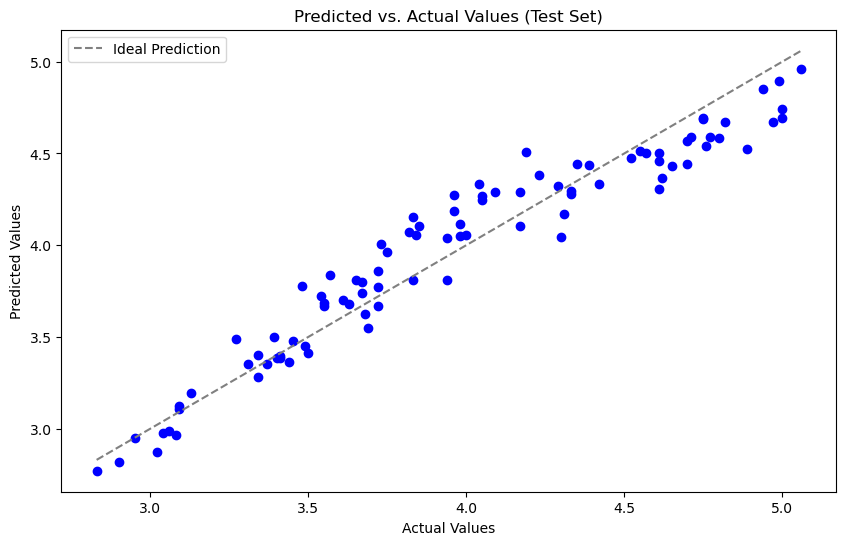

In [267]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [268]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16327599650798322
RAE: 0.2648658161282932
MAE: 0.13424478551615843
R2: 0.9247850155623717


In [270]:
x_reduced3 = data[['Sunlight hours','Solar Radiation', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced3, x_reduced3, y_train, y_ = train_test_split(x_reduced3, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced3, x_test_reduced3, y_cv, y_test = train_test_split(x_reduced3, y_, test_size=0.50, random_state=1)



In [271]:
scaler = StandardScaler()
x_train_scaled_reduced3 = scaler.fit_transform(x_train_reduced3)
x_cv_scaled__reduced3 = scaler.transform(x_cv_reduced3)
x_test_scaled_reduced3 = scaler.transform(x_test_reduced3)

In [272]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced3, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 3ms/step - loss: 15.6705 - mae: 3.9263
Epoch 2/300
9/9 [==============================] - 0s 4ms/step - loss: 14.8667 - mae: 3.8198
Epoch 3/300
9/9 [==============================] - 0s 4ms/step - loss: 14.0947 - mae: 3.7139
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 13.3535 - mae: 3.6088
Epoch 5/300
9/9 [==============================] - 0s 5ms/step - loss: 12.6331 - mae: 3.5032
Epoch 6/300
9/9 [==============================] - 0s 4ms/step - loss: 11.9502 - mae: 3.4001
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 11.2755 - mae: 3.2948
Epoch 8/300
9/9 [==============================] - 0s 4ms/step - loss: 10.6152 - mae: 3.1869
Epoch 9/300
9/9 [==============================] - 0s 4ms/step - loss: 9.9883 - mae: 3.0826
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 9.3646 - mae: 2.9739
Epoch 11/300
9/9 [==============================] - 0s 4ms/step - loss:

9/9 [==============================] - 0s 3ms/step - loss: 0.1562 - mae: 0.3122
Epoch 90/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1517 - mae: 0.3075
Epoch 91/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1474 - mae: 0.3032
Epoch 92/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1432 - mae: 0.2987
Epoch 93/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1392 - mae: 0.2941
Epoch 94/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1354 - mae: 0.2899
Epoch 95/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1318 - mae: 0.2862
Epoch 96/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1283 - mae: 0.2819
Epoch 97/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1249 - mae: 0.2774
Epoch 98/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1215 - mae: 0.2738
Epoch 99/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1184 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.0340 - mae: 0.1403
Epoch 177/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0336 - mae: 0.1394
Epoch 178/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0334 - mae: 0.1390
Epoch 179/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0331 - mae: 0.1384
Epoch 180/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0328 - mae: 0.1378
Epoch 181/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0327 - mae: 0.1375
Epoch 182/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0324 - mae: 0.1368
Epoch 183/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0322 - mae: 0.1365
Epoch 184/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0320 - mae: 0.1362
Epoch 185/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0317 - mae: 0.1355
Epoch 186/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0243 - mae: 0.1207
Epoch 264/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0245 - mae: 0.1211
Epoch 265/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0242 - mae: 0.1206
Epoch 266/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0243 - mae: 0.1205
Epoch 267/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0242 - mae: 0.1204
Epoch 268/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0242 - mae: 0.1205
Epoch 269/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0242 - mae: 0.1203
Epoch 270/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0242 - mae: 0.1204
Epoch 271/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0241 - mae: 0.1204
Epoch 272/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0241 - mae: 0.1201
Epoch 273/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 2ms/step - loss: 0.6293 - mae: 0.5874
Epoch 51/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6119 - mae: 0.5783
Epoch 52/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5947 - mae: 0.5689
Epoch 53/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5785 - mae: 0.5602
Epoch 54/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5627 - mae: 0.5513
Epoch 55/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5473 - mae: 0.5430
Epoch 56/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5328 - mae: 0.5350
Epoch 57/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5183 - mae: 0.5270
Epoch 58/300
9/9 [==============================] - 0s 3ms/step - loss: 0.5049 - mae: 0.5191
Epoch 59/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4913 - mae: 0.5112
Epoch 60/300
9/9 [==============================] - 0s 3ms/step - loss: 0.4786 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.1301 - mae: 0.2198
Epoch 138/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1286 - mae: 0.2181
Epoch 139/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1272 - mae: 0.2163
Epoch 140/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1258 - mae: 0.2147
Epoch 141/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1245 - mae: 0.2131
Epoch 142/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1232 - mae: 0.2116
Epoch 143/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1219 - mae: 0.2102
Epoch 144/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1207 - mae: 0.2087
Epoch 145/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1192 - mae: 0.2069
Epoch 146/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1180 - mae: 0.2053
Epoch 147/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 11ms/step - loss: 0.0672 - mae: 0.1412
Epoch 225/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0670 - mae: 0.1407
Epoch 226/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0666 - mae: 0.1404
Epoch 227/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0663 - mae: 0.1401
Epoch 228/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0660 - mae: 0.1399
Epoch 229/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0657 - mae: 0.1394
Epoch 230/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0655 - mae: 0.1388
Epoch 231/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0651 - mae: 0.1383
Epoch 232/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0648 - mae: 0.1381
Epoch 233/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0645 - mae: 0.1377
Epoch 234/300
9/9 [==============================] - 0s 4ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 8.5795 - mae: 2.8498
Epoch 12/300
9/9 [==============================] - 0s 4ms/step - loss: 7.8980 - mae: 2.7253
Epoch 13/300
9/9 [==============================] - 0s 5ms/step - loss: 7.2475 - mae: 2.5996
Epoch 14/300
9/9 [==============================] - 0s 4ms/step - loss: 6.6352 - mae: 2.4752
Epoch 15/300
9/9 [==============================] - 0s 6ms/step - loss: 6.0538 - mae: 2.3504
Epoch 16/300
9/9 [==============================] - 0s 4ms/step - loss: 5.5104 - mae: 2.2258
Epoch 17/300
9/9 [==============================] - 0s 5ms/step - loss: 5.0046 - mae: 2.1035
Epoch 18/300
9/9 [==============================] - 0s 5ms/step - loss: 4.5381 - mae: 1.9832
Epoch 19/300
9/9 [==============================] - 0s 6ms/step - loss: 4.1074 - mae: 1.8670
Epoch 20/300
9/9 [==============================] - 0s 3ms/step - loss: 3.7160 - mae: 1.7532
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 3.3631 - ma

9/9 [==============================] - 0s 6ms/step - loss: 0.2222 - mae: 0.2282
Epoch 100/300
9/9 [==============================] - 0s 6ms/step - loss: 0.2190 - mae: 0.2254
Epoch 101/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2159 - mae: 0.2226
Epoch 102/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2129 - mae: 0.2198
Epoch 103/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2100 - mae: 0.2172
Epoch 104/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2073 - mae: 0.2149
Epoch 105/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2047 - mae: 0.2126
Epoch 106/300
9/9 [==============================] - 0s 3ms/step - loss: 0.2020 - mae: 0.2103
Epoch 107/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1994 - mae: 0.2080
Epoch 108/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1970 - mae: 0.2057
Epoch 109/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.1028 - mae: 0.1372
Epoch 187/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1023 - mae: 0.1369
Epoch 188/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1016 - mae: 0.1368
Epoch 189/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1009 - mae: 0.1364
Epoch 190/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1004 - mae: 0.1366
Epoch 191/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0996 - mae: 0.1359
Epoch 192/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0990 - mae: 0.1354
Epoch 193/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0984 - mae: 0.1352
Epoch 194/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0979 - mae: 0.1350
Epoch 195/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0973 - mae: 0.1349
Epoch 196/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0641 - mae: 0.1260
Epoch 274/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0637 - mae: 0.1257
Epoch 275/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0634 - mae: 0.1257
Epoch 276/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0633 - mae: 0.1264
Epoch 277/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0628 - mae: 0.1253
Epoch 278/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0626 - mae: 0.1251
Epoch 279/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0623 - mae: 0.1251
Epoch 280/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0620 - mae: 0.1254
Epoch 281/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0617 - mae: 0.1256
Epoch 282/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0614 - mae: 0.1249
Epoch 283/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.8591 - mae: 0.4946
Epoch 61/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8355 - mae: 0.4834
Epoch 62/300
9/9 [==============================] - 0s 3ms/step - loss: 0.8129 - mae: 0.4725
Epoch 63/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7907 - mae: 0.4621
Epoch 64/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7687 - mae: 0.4516
Epoch 65/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7476 - mae: 0.4416
Epoch 66/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7275 - mae: 0.4315
Epoch 67/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7077 - mae: 0.4217
Epoch 68/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6888 - mae: 0.4122
Epoch 69/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6705 - mae: 0.4029
Epoch 70/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6525 - ma

9/9 [==============================] - 0s 3ms/step - loss: 0.1589 - mae: 0.1504
Epoch 148/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1567 - mae: 0.1496
Epoch 149/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1545 - mae: 0.1490
Epoch 150/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1523 - mae: 0.1483
Epoch 151/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1502 - mae: 0.1479
Epoch 152/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1481 - mae: 0.1474
Epoch 153/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1460 - mae: 0.1469
Epoch 154/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1440 - mae: 0.1465
Epoch 155/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1421 - mae: 0.1460
Epoch 156/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1401 - mae: 0.1455
Epoch 157/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 3ms/step - loss: 0.0613 - mae: 0.1379
Epoch 235/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0608 - mae: 0.1374
Epoch 236/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0603 - mae: 0.1372
Epoch 237/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0600 - mae: 0.1373
Epoch 238/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0596 - mae: 0.1376
Epoch 239/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0592 - mae: 0.1375
Epoch 240/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0588 - mae: 0.1375
Epoch 241/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0584 - mae: 0.1375
Epoch 242/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0581 - mae: 0.1375
Epoch 243/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0577 - mae: 0.1372
Epoch 244/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 3.4917 - mae: 1.3757
Epoch 22/300
9/9 [==============================] - 0s 3ms/step - loss: 3.2311 - mae: 1.2754
Epoch 23/300
9/9 [==============================] - 0s 3ms/step - loss: 3.0058 - mae: 1.1869
Epoch 24/300
9/9 [==============================] - 0s 2ms/step - loss: 2.8098 - mae: 1.1094
Epoch 25/300
9/9 [==============================] - 0s 2ms/step - loss: 2.6389 - mae: 1.0387
Epoch 26/300
9/9 [==============================] - 0s 2ms/step - loss: 2.4876 - mae: 0.9791
Epoch 27/300
9/9 [==============================] - 0s 2ms/step - loss: 2.3576 - mae: 0.9274
Epoch 28/300
9/9 [==============================] - 0s 2ms/step - loss: 2.2387 - mae: 0.8825
Epoch 29/300
9/9 [==============================] - 0s 2ms/step - loss: 2.1315 - mae: 0.8399
Epoch 30/300
9/9 [==============================] - 0s 2ms/step - loss: 2.0329 - mae: 0.8018
Epoch 31/300
9/9 [==============================] - 0s 2ms/step - loss: 1.9435 - ma

9/9 [==============================] - 0s 2ms/step - loss: 0.1267 - mae: 0.1429
Epoch 110/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1239 - mae: 0.1428
Epoch 111/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1211 - mae: 0.1426
Epoch 112/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1186 - mae: 0.1426
Epoch 113/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1159 - mae: 0.1423
Epoch 114/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1133 - mae: 0.1422
Epoch 115/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1109 - mae: 0.1419
Epoch 116/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1085 - mae: 0.1419
Epoch 117/300
9/9 [==============================] - 0s 3ms/step - loss: 0.1062 - mae: 0.1420
Epoch 118/300
9/9 [==============================] - 0s 2ms/step - loss: 0.1040 - mae: 0.1418
Epoch 119/300
9/9 [==============================] - 0s 2ms/step - loss: 0

9/9 [==============================] - 0s 2ms/step - loss: 0.0489 - mae: 0.1466
Epoch 197/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0486 - mae: 0.1464
Epoch 198/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0485 - mae: 0.1464
Epoch 199/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0484 - mae: 0.1463
Epoch 200/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0484 - mae: 0.1465
Epoch 201/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0483 - mae: 0.1458
Epoch 202/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0481 - mae: 0.1458
Epoch 203/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0480 - mae: 0.1460
Epoch 204/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0480 - mae: 0.1468
Epoch 205/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0479 - mae: 0.1469
Epoch 206/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 2ms/step - loss: 0.0458 - mae: 0.1459
Epoch 284/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - mae: 0.1456
Epoch 285/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0458 - mae: 0.1453
Epoch 286/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0458 - mae: 0.1458
Epoch 287/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0460 - mae: 0.1461
Epoch 288/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0458 - mae: 0.1457
Epoch 289/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - mae: 0.1460
Epoch 290/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0456 - mae: 0.1459
Epoch 291/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - mae: 0.1463
Epoch 292/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0457 - mae: 0.1460
Epoch 293/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 2ms/step - loss: 0.7447 - mae: 0.2410
Epoch 71/300
9/9 [==============================] - 0s 3ms/step - loss: 0.7171 - mae: 0.2325
Epoch 72/300
9/9 [==============================] - 0s 3ms/step - loss: 0.6912 - mae: 0.2251
Epoch 73/300
9/9 [==============================] - 0s 2ms/step - loss: 0.6664 - mae: 0.2177
Epoch 74/300
9/9 [==============================] - 0s 2ms/step - loss: 0.6429 - mae: 0.2117
Epoch 75/300
9/9 [==============================] - 0s 2ms/step - loss: 0.6201 - mae: 0.2060
Epoch 76/300
9/9 [==============================] - 0s 2ms/step - loss: 0.5987 - mae: 0.2014
Epoch 77/300
9/9 [==============================] - 0s 2ms/step - loss: 0.5782 - mae: 0.1968
Epoch 78/300
9/9 [==============================] - 0s 2ms/step - loss: 0.5588 - mae: 0.1925
Epoch 79/300
9/9 [==============================] - 0s 2ms/step - loss: 0.5400 - mae: 0.1881
Epoch 80/300
9/9 [==============================] - 0s 2ms/step - loss: 0.5222 - ma

9/9 [==============================] - 0s 2ms/step - loss: 0.0764 - mae: 0.1443
Epoch 158/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0754 - mae: 0.1443
Epoch 159/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0746 - mae: 0.1446
Epoch 160/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0738 - mae: 0.1448
Epoch 161/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0730 - mae: 0.1450
Epoch 162/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0722 - mae: 0.1452
Epoch 163/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0715 - mae: 0.1453
Epoch 164/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0708 - mae: 0.1457
Epoch 165/300
9/9 [==============================] - 0s 2ms/step - loss: 0.0701 - mae: 0.1459
Epoch 166/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0695 - mae: 0.1458
Epoch 167/300
9/9 [==============================] - 0s 3ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.0570 - mae: 0.1535
Epoch 245/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0569 - mae: 0.1535
Epoch 246/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0568 - mae: 0.1534
Epoch 247/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0569 - mae: 0.1538
Epoch 248/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0568 - mae: 0.1538
Epoch 249/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0569 - mae: 0.1535
Epoch 250/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0568 - mae: 0.1530
Epoch 251/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0566 - mae: 0.1528
Epoch 252/300
9/9 [==============================] - 0s 3ms/step - loss: 0.0567 - mae: 0.1530
Epoch 253/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0567 - mae: 0.1531
Epoch 254/300
9/9 [==============================] - 0s 4ms/step - loss: 0

In [273]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced3)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced3)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 3ms/step
RESULTS:
Model 1: Training MSE: 0.01, CV MSE: 0.01
Model 2: Training MSE: 0.01, CV MSE: 0.01
Model 3: Training MSE: 0.01, CV MSE: 0.01
Model 4: Training MSE: 0.02, CV MSE: 0.01
Model 5: Training MSE: 0.02, CV MSE: 0.01
Model 6: Training MSE: 0.02, CV MSE: 0.02


In [274]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced3)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 3ms/step
Selected Model: 3
Training MSE: 0.01
Cross Validation MSE: 0.01
Test MSE: 0.01


In [275]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.83          3.816062
1           3.83          4.233313
2           3.49          3.341586
3           3.63          3.778169
4           3.72          3.642079
5           4.62          4.453297
6           4.65          4.510717

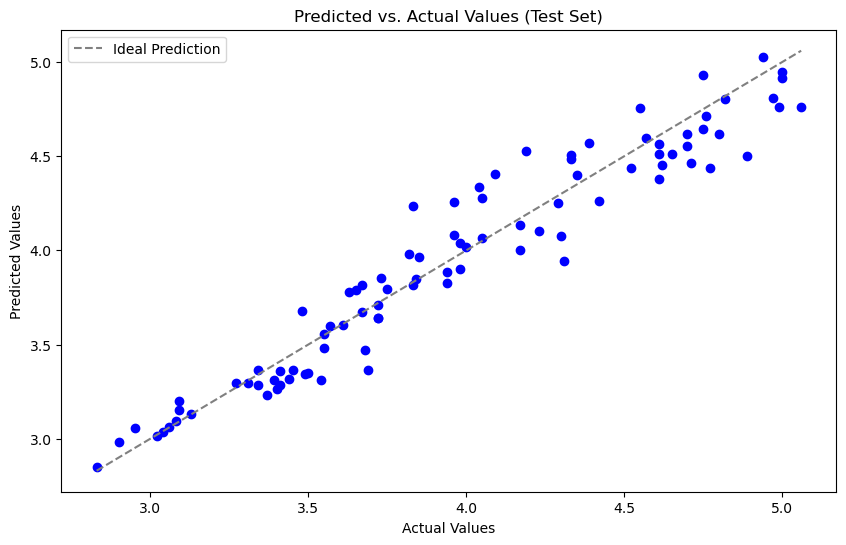

In [276]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat, marker='o', color='blue')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray', label='Ideal Prediction')
plt.legend()
plt.show()

In [277]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15830524360158377
RAE: 0.2430014676248981
MAE: 0.12316304300142375
R2: 0.9292949742606971


In [293]:
x_reduced4 = data[['Temp max','Wind speed', 'Temp min']].values
y = data['ETo'].values

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train_reduced4, x_reduced4, y_train, y_ = train_test_split(x_reduced4, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv_reduced4, x_test_reduced4, y_cv, y_test = train_test_split(x_reduced4, y_, test_size=0.50, random_state=1)


In [294]:
scaler = StandardScaler()
x_train_scaled_reduced4 = scaler.fit_transform(x_train_reduced4)
x_cv_scaled__reduced4 = scaler.transform(x_cv_reduced4)
x_test_scaled_reduced4 = scaler.transform(x_test_reduced4)

In [300]:
lambdas = [0, 0.01, 0.03, 0.1, 0.2, 0.35]
models=[None] * len(lambdas)
for i in range(len(lambdas)):
    lambda_ = lambdas[i]
    models[i] =  Sequential(
        [
            Dense(25, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(lambda_)),
            Dense(1, activation = 'linear')
        ]
    )
    models[i].compile(
        loss='mse',
        optimizer = 'adam',
        metrics = ['mae']
    )

    history = models[i].fit(
    x_train_scaled_reduced4, y_train,
    epochs=300
)
    print(f"Finished lambda = {lambda_}")

Epoch 1/300
9/9 [==============================] - 1s 4ms/step - loss: 17.5468 - mae: 4.1417
Epoch 2/300
9/9 [==============================] - 0s 5ms/step - loss: 16.6528 - mae: 4.0314
Epoch 3/300
9/9 [==============================] - 0s 5ms/step - loss: 15.7793 - mae: 3.9214
Epoch 4/300
9/9 [==============================] - 0s 5ms/step - loss: 14.9615 - mae: 3.8144
Epoch 5/300
9/9 [==============================] - 0s 4ms/step - loss: 14.1569 - mae: 3.7061
Epoch 6/300
9/9 [==============================] - 0s 6ms/step - loss: 13.3849 - mae: 3.5981
Epoch 7/300
9/9 [==============================] - 0s 4ms/step - loss: 12.6407 - mae: 3.4925
Epoch 8/300
9/9 [==============================] - 0s 6ms/step - loss: 11.9222 - mae: 3.3847
Epoch 9/300
9/9 [==============================] - 0s 7ms/step - loss: 11.2289 - mae: 3.2777
Epoch 10/300
9/9 [==============================] - 0s 6ms/step - loss: 10.5584 - mae: 3.1713
Epoch 11/300
9/9 [==============================] - 0s 7ms/step - los

9/9 [==============================] - 0s 10ms/step - loss: 0.2700 - mae: 0.4212
Epoch 90/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2630 - mae: 0.4152
Epoch 91/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2563 - mae: 0.4094
Epoch 92/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2502 - mae: 0.4038
Epoch 93/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2437 - mae: 0.3983
Epoch 94/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2376 - mae: 0.3928
Epoch 95/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2315 - mae: 0.3873
Epoch 96/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2261 - mae: 0.3822
Epoch 97/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2204 - mae: 0.3767
Epoch 98/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2147 - mae: 0.3713
Epoch 99/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2095 - m

9/9 [==============================] - 0s 4ms/step - loss: 0.0602 - mae: 0.1914
Epoch 177/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0597 - mae: 0.1908
Epoch 178/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0592 - mae: 0.1902
Epoch 179/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0588 - mae: 0.1894
Epoch 180/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0583 - mae: 0.1884
Epoch 181/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0580 - mae: 0.1878
Epoch 182/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0575 - mae: 0.1872
Epoch 183/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0572 - mae: 0.1868
Epoch 184/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0568 - mae: 0.1862
Epoch 185/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0564 - mae: 0.1855
Epoch 186/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0435 - mae: 0.1627
Epoch 264/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0435 - mae: 0.1628
Epoch 265/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0434 - mae: 0.1625
Epoch 266/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0434 - mae: 0.1625
Epoch 267/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0433 - mae: 0.1622
Epoch 268/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.1621
Epoch 269/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0432 - mae: 0.1620
Epoch 270/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0431 - mae: 0.1617
Epoch 271/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.1616
Epoch 272/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0429 - mae: 0.1614
Epoch 273/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 4ms/step - loss: 0.8887 - mae: 0.7111
Epoch 51/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8687 - mae: 0.7030
Epoch 52/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8520 - mae: 0.6961
Epoch 53/300
9/9 [==============================] - 0s 4ms/step - loss: 0.8357 - mae: 0.6886
Epoch 54/300
9/9 [==============================] - 0s 5ms/step - loss: 0.8188 - mae: 0.6813
Epoch 55/300
9/9 [==============================] - 0s 6ms/step - loss: 0.8030 - mae: 0.6739
Epoch 56/300
9/9 [==============================] - 0s 5ms/step - loss: 0.7882 - mae: 0.6672
Epoch 57/300
9/9 [==============================] - 0s 6ms/step - loss: 0.7737 - mae: 0.6603
Epoch 58/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7595 - mae: 0.6536
Epoch 59/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7456 - mae: 0.6470
Epoch 60/300
9/9 [==============================] - 0s 4ms/step - loss: 0.7321 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.1726 - mae: 0.2566
Epoch 138/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1701 - mae: 0.2538
Epoch 139/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1676 - mae: 0.2509
Epoch 140/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1654 - mae: 0.2483
Epoch 141/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1630 - mae: 0.2454
Epoch 142/300
9/9 [==============================] - 0s 9ms/step - loss: 0.1610 - mae: 0.2430
Epoch 143/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1588 - mae: 0.2399
Epoch 144/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1566 - mae: 0.2373
Epoch 145/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1548 - mae: 0.2348
Epoch 146/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1528 - mae: 0.2323
Epoch 147/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0921 - mae: 0.1636
Epoch 225/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0918 - mae: 0.1628
Epoch 226/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0914 - mae: 0.1624
Epoch 227/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0912 - mae: 0.1624
Epoch 228/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0909 - mae: 0.1620
Epoch 229/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0908 - mae: 0.1621
Epoch 230/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0902 - mae: 0.1617
Epoch 231/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0901 - mae: 0.1615
Epoch 232/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0899 - mae: 0.1613
Epoch 233/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0894 - mae: 0.1610
Epoch 234/300
9/9 [==============================] - 0s 8ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 9.4239 - mae: 3.0043
Epoch 12/300
9/9 [==============================] - 0s 5ms/step - loss: 8.8412 - mae: 2.9007
Epoch 13/300
9/9 [==============================] - 0s 10ms/step - loss: 8.2803 - mae: 2.7974
Epoch 14/300
9/9 [==============================] - 0s 4ms/step - loss: 7.7291 - mae: 2.6902
Epoch 15/300
9/9 [==============================] - 0s 5ms/step - loss: 7.1941 - mae: 2.5808
Epoch 16/300
9/9 [==============================] - 0s 6ms/step - loss: 6.6735 - mae: 2.4701
Epoch 17/300
9/9 [==============================] - 0s 4ms/step - loss: 6.1730 - mae: 2.3580
Epoch 18/300
9/9 [==============================] - 0s 5ms/step - loss: 5.6947 - mae: 2.2439
Epoch 19/300
9/9 [==============================] - 0s 5ms/step - loss: 5.2378 - mae: 2.1325
Epoch 20/300
9/9 [==============================] - 0s 5ms/step - loss: 4.8028 - mae: 2.0183
Epoch 21/300
9/9 [==============================] - 0s 5ms/step - loss: 4.3933 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.2954 - mae: 0.2985
Epoch 100/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2900 - mae: 0.2946
Epoch 101/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2848 - mae: 0.2909
Epoch 102/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2798 - mae: 0.2875
Epoch 103/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2750 - mae: 0.2846
Epoch 104/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2704 - mae: 0.2813
Epoch 105/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2656 - mae: 0.2778
Epoch 106/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2613 - mae: 0.2747
Epoch 107/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2570 - mae: 0.2718
Epoch 108/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2527 - mae: 0.2689
Epoch 109/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.1132 - mae: 0.1935
Epoch 187/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1124 - mae: 0.1930
Epoch 188/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1117 - mae: 0.1930
Epoch 189/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1111 - mae: 0.1935
Epoch 190/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1104 - mae: 0.1939
Epoch 191/300
9/9 [==============================] - 0s 6ms/step - loss: 0.1097 - mae: 0.1935
Epoch 192/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1091 - mae: 0.1930
Epoch 193/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1085 - mae: 0.1931
Epoch 194/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1080 - mae: 0.1933
Epoch 195/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1073 - mae: 0.1930
Epoch 196/300
9/9 [==============================] - 0s 5ms/step - loss: 0

9/9 [==============================] - 0s 12ms/step - loss: 0.0788 - mae: 0.1889
Epoch 274/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0787 - mae: 0.1891
Epoch 275/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0784 - mae: 0.1879
Epoch 276/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0781 - mae: 0.1874
Epoch 277/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0779 - mae: 0.1885
Epoch 278/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0778 - mae: 0.1878
Epoch 279/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0774 - mae: 0.1877
Epoch 280/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0772 - mae: 0.1878
Epoch 281/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0769 - mae: 0.1870
Epoch 282/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0768 - mae: 0.1868
Epoch 283/300
9/9 [==============================] - 0s 4ms/step - loss: 

9/9 [==============================] - 0s 5ms/step - loss: 0.6930 - mae: 0.4059
Epoch 61/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6756 - mae: 0.3986
Epoch 62/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6587 - mae: 0.3917
Epoch 63/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6422 - mae: 0.3850
Epoch 64/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6259 - mae: 0.3782
Epoch 65/300
9/9 [==============================] - 0s 4ms/step - loss: 0.6103 - mae: 0.3717
Epoch 66/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5952 - mae: 0.3655
Epoch 67/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5807 - mae: 0.3594
Epoch 68/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5658 - mae: 0.3531
Epoch 69/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5521 - mae: 0.3474
Epoch 70/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5384 - ma

9/9 [==============================] - 0s 4ms/step - loss: 0.1252 - mae: 0.1893
Epoch 148/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1237 - mae: 0.1890
Epoch 149/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1225 - mae: 0.1891
Epoch 150/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1210 - mae: 0.1889
Epoch 151/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1197 - mae: 0.1899
Epoch 152/300
9/9 [==============================] - 0s 5ms/step - loss: 0.1186 - mae: 0.1907
Epoch 153/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1173 - mae: 0.1906
Epoch 154/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1163 - mae: 0.1901
Epoch 155/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1149 - mae: 0.1891
Epoch 156/300
9/9 [==============================] - 0s 4ms/step - loss: 0.1139 - mae: 0.1900
Epoch 157/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.0760 - mae: 0.1965
Epoch 235/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0757 - mae: 0.1966
Epoch 236/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0753 - mae: 0.1968
Epoch 237/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0751 - mae: 0.1963
Epoch 238/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0750 - mae: 0.1948
Epoch 239/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0748 - mae: 0.1947
Epoch 240/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0747 - mae: 0.1946
Epoch 241/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0745 - mae: 0.1964
Epoch 242/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0744 - mae: 0.1971
Epoch 243/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0742 - mae: 0.1948
Epoch 244/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 6ms/step - loss: 6.4808 - mae: 2.1405
Epoch 22/300
9/9 [==============================] - 0s 6ms/step - loss: 6.1378 - mae: 2.0527
Epoch 23/300
9/9 [==============================] - 0s 4ms/step - loss: 5.8074 - mae: 1.9680
Epoch 24/300
9/9 [==============================] - 0s 4ms/step - loss: 5.4992 - mae: 1.8854
Epoch 25/300
9/9 [==============================] - 0s 5ms/step - loss: 5.2016 - mae: 1.8047
Epoch 26/300
9/9 [==============================] - 0s 5ms/step - loss: 4.9237 - mae: 1.7297
Epoch 27/300
9/9 [==============================] - 0s 5ms/step - loss: 4.6543 - mae: 1.6581
Epoch 28/300
9/9 [==============================] - 0s 6ms/step - loss: 4.4073 - mae: 1.5900
Epoch 29/300
9/9 [==============================] - 0s 9ms/step - loss: 4.1675 - mae: 1.5216
Epoch 30/300
9/9 [==============================] - 0s 4ms/step - loss: 3.9439 - mae: 1.4577
Epoch 31/300
9/9 [==============================] - 0s 5ms/step - loss: 3.7377 - ma

9/9 [==============================] - 0s 5ms/step - loss: 0.2751 - mae: 0.2329
Epoch 110/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2688 - mae: 0.2317
Epoch 111/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2629 - mae: 0.2306
Epoch 112/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2572 - mae: 0.2295
Epoch 113/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2517 - mae: 0.2284
Epoch 114/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2464 - mae: 0.2274
Epoch 115/300
9/9 [==============================] - 0s 5ms/step - loss: 0.2412 - mae: 0.2265
Epoch 116/300
9/9 [==============================] - 0s 11ms/step - loss: 0.2363 - mae: 0.2258
Epoch 117/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2312 - mae: 0.2248
Epoch 118/300
9/9 [==============================] - 0s 4ms/step - loss: 0.2267 - mae: 0.2242
Epoch 119/300
9/9 [==============================] - 0s 4ms/step - loss: 

9/9 [==============================] - 0s 6ms/step - loss: 0.0895 - mae: 0.2048
Epoch 197/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0891 - mae: 0.2053
Epoch 198/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0887 - mae: 0.2053
Epoch 199/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0884 - mae: 0.2045
Epoch 200/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0881 - mae: 0.2040
Epoch 201/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0878 - mae: 0.2043
Epoch 202/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0875 - mae: 0.2045
Epoch 203/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0871 - mae: 0.2040
Epoch 204/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0869 - mae: 0.2044
Epoch 205/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0867 - mae: 0.2038
Epoch 206/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 8ms/step - loss: 0.0791 - mae: 0.2022
Epoch 284/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0795 - mae: 0.2042
Epoch 285/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0795 - mae: 0.2050
Epoch 286/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0796 - mae: 0.2026
Epoch 287/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0794 - mae: 0.2017
Epoch 288/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0794 - mae: 0.2016
Epoch 289/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0792 - mae: 0.2020
Epoch 290/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0791 - mae: 0.2025
Epoch 291/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0791 - mae: 0.2020
Epoch 292/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0792 - mae: 0.2020
Epoch 293/300
9/9 [==============================] - 0s 4ms/step - loss: 0

9/9 [==============================] - 0s 5ms/step - loss: 0.6417 - mae: 0.3268
Epoch 71/300
9/9 [==============================] - 0s 5ms/step - loss: 0.6164 - mae: 0.3202
Epoch 72/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5914 - mae: 0.3133
Epoch 73/300
9/9 [==============================] - 0s 6ms/step - loss: 0.5680 - mae: 0.3074
Epoch 74/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5458 - mae: 0.3013
Epoch 75/300
9/9 [==============================] - 0s 5ms/step - loss: 0.5241 - mae: 0.2954
Epoch 76/300
9/9 [==============================] - 0s 4ms/step - loss: 0.5037 - mae: 0.2899
Epoch 77/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4845 - mae: 0.2846
Epoch 78/300
9/9 [==============================] - 0s 6ms/step - loss: 0.4660 - mae: 0.2799
Epoch 79/300
9/9 [==============================] - 0s 7ms/step - loss: 0.4481 - mae: 0.2750
Epoch 80/300
9/9 [==============================] - 0s 11ms/step - loss: 0.4314 - m

9/9 [==============================] - 0s 5ms/step - loss: 0.0976 - mae: 0.2089
Epoch 158/300
9/9 [==============================] - 0s 4ms/step - loss: 0.0972 - mae: 0.2087
Epoch 159/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0968 - mae: 0.2085
Epoch 160/300
9/9 [==============================] - 0s 5ms/step - loss: 0.0963 - mae: 0.2088
Epoch 161/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0961 - mae: 0.2097
Epoch 162/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0958 - mae: 0.2098
Epoch 163/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0953 - mae: 0.2091
Epoch 164/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0951 - mae: 0.2098
Epoch 165/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0947 - mae: 0.2097
Epoch 166/300
9/9 [==============================] - 0s 8ms/step - loss: 0.0944 - mae: 0.2091
Epoch 167/300
9/9 [==============================] - 0s 9ms/step - loss: 

9/9 [==============================] - 0s 22ms/step - loss: 0.0885 - mae: 0.2102
Epoch 245/300
9/9 [==============================] - 0s 12ms/step - loss: 0.0887 - mae: 0.2103
Epoch 246/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0886 - mae: 0.2099
Epoch 247/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0885 - mae: 0.2096
Epoch 248/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0887 - mae: 0.2093
Epoch 249/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0889 - mae: 0.2110
Epoch 250/300
9/9 [==============================] - 0s 6ms/step - loss: 0.0886 - mae: 0.2108
Epoch 251/300
9/9 [==============================] - 0s 7ms/step - loss: 0.0885 - mae: 0.2096
Epoch 252/300
9/9 [==============================] - 0s 9ms/step - loss: 0.0885 - mae: 0.2091
Epoch 253/300
9/9 [==============================] - 0s 10ms/step - loss: 0.0887 - mae: 0.2105
Epoch 254/300
9/9 [==============================] - 0s 8ms/step - loss

In [301]:
nn_train_mses = []
nn_cv_mses = []

for i in range(len(models)):
    yhat = models[i].predict(x_train_scaled_reduced4)
    train_mse = mean_squared_error(y_train, yhat) / 2
    nn_train_mses.append(train_mse)

    # Record the cross validation MSEs 
    yhat = models[i].predict(x_cv_scaled__reduced4)
    cv_mse = mean_squared_error(y_cv, yhat) / 2
    nn_cv_mses.append(cv_mse)

    
# print results
print("RESULTS:")
for model_num in range(len(nn_train_mses)):
    print(
        f"Model {model_num+1}: Training MSE: {nn_train_mses[model_num]:.2f}, " +
        f"CV MSE: {nn_cv_mses[model_num]:.2f}"
        )

3/3 [==============================] - 0s 5ms/step
RESULTS:
Model 1: Training MSE: 0.02, CV MSE: 0.02
Model 2: Training MSE: 0.02, CV MSE: 0.02
Model 3: Training MSE: 0.03, CV MSE: 0.02
Model 4: Training MSE: 0.03, CV MSE: 0.02
Model 5: Training MSE: 0.03, CV MSE: 0.03
Model 6: Training MSE: 0.03, CV MSE: 0.03


In [323]:
# Select the model with the lowest CV MSE
model_num = 3

# Compute the test MSE
yhat = models[model_num-1].predict(x_test_scaled_reduced4)
test_mse = mean_squared_error(y_test, yhat) / 2

print(f"Selected Model: {model_num}")
print(f"Training MSE: {nn_train_mses[model_num-1]:.2f}")
print(f"Cross Validation MSE: {nn_cv_mses[model_num-1]:.2f}")
print(f"Test MSE: {test_mse:.2f}")

3/3 [==============================] - 0s 3ms/step
Selected Model: 3
Training MSE: 0.03
Cross Validation MSE: 0.02
Test MSE: 0.03


In [324]:
comparison_df = pd.DataFrame({'Actual Values': y_test.flatten(), 'Predicted Values': yhat.flatten()})
pd.set_option('display.max_rows', None)

# Print the DataFrame
differences = np.absolute(y_test - yhat.flatten()).flatten()
df_differences = pd.DataFrame({'differences':differences})
comparison_df.head(7)

Actual Values  Predicted Values
0           3.83          3.862602
1           3.83          3.948336
2           3.49          3.471735
3           3.63          3.427802
4           3.72          3.476956
5           4.62          4.468709
6           4.65          4.604256

In [325]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test, yhat))
mae = mean_absolute_error(y_test, yhat)
rae = np.sum(np.abs(y_test - yhat.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.22713783271784319
RAE: 0.3475695424709134
MAE: 0.1761624031481535
R2: 0.8544411421945342


Mean Squared Error on Validation Set for Decision Tree: 0.01
Mean Squared Error for Decision Tree: 0.02


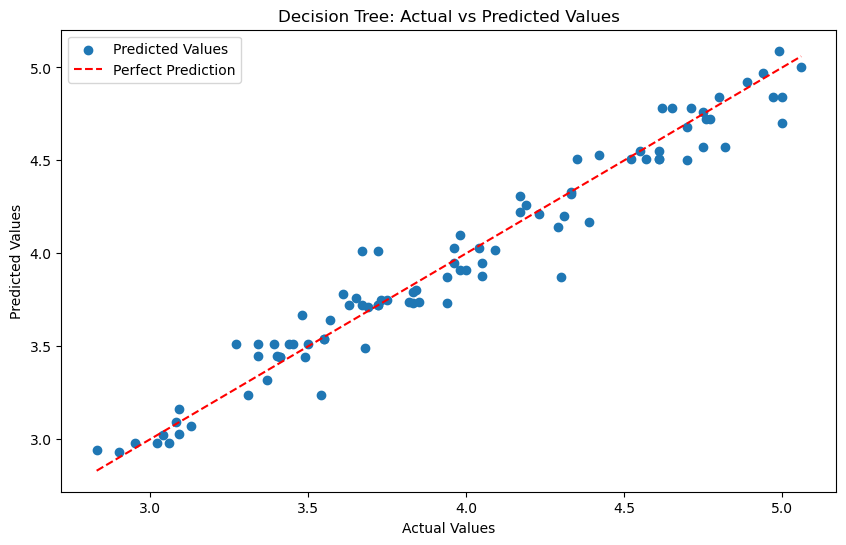

In [331]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled, y_train)

yhat_cv = tree.predict(x_cv_scaled)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [332]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12526059792011346
RAE: 0.1833609175039044
MAE: 0.0929347826086956
R2: 0.9557321280742249


Mean Squared Error on Validation Set for Decision Tree: 0.03
Mean Squared Error for Decision Tree: 0.04


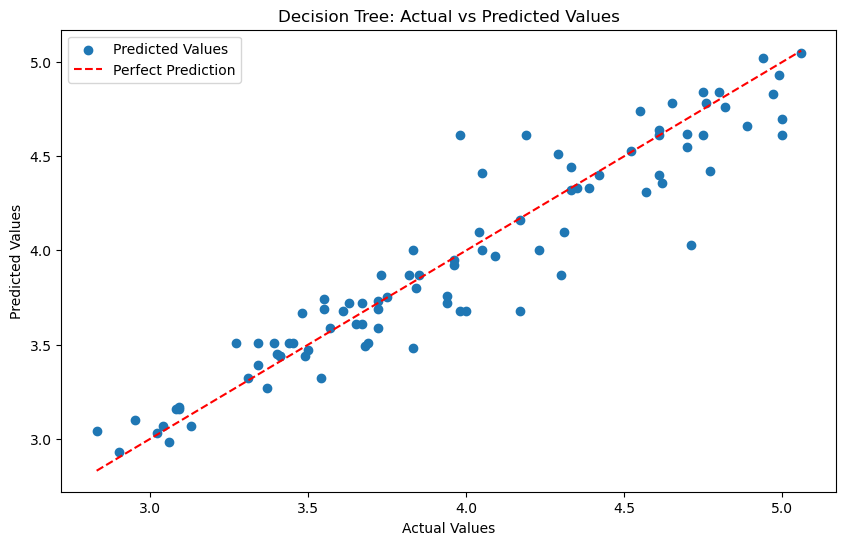

In [334]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [335]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19335707000712213
RAE: 0.2706450033800321
MAE: 0.13717391304347826
R2: 0.8945176499647413


Mean Squared Error on Validation Set for Decision Tree: 0.04
Mean Squared Error for Decision Tree: 0.04


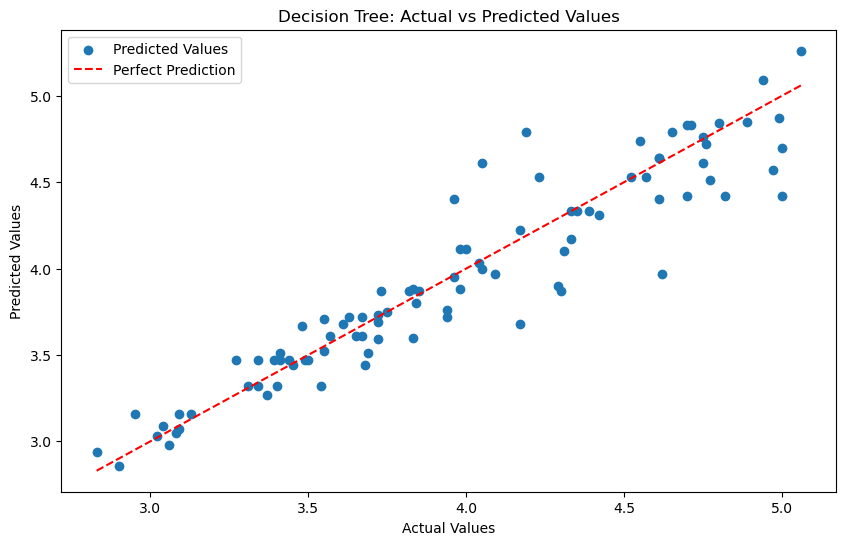

In [341]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced2, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced2)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced2)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [342]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.20326412459611776
RAE: 0.2755775192894938
MAE: 0.13967391304347823
R2: 0.8834315150834335


Mean Squared Error on Validation Set for Decision Tree: 0.03
Mean Squared Error for Decision Tree: 0.05


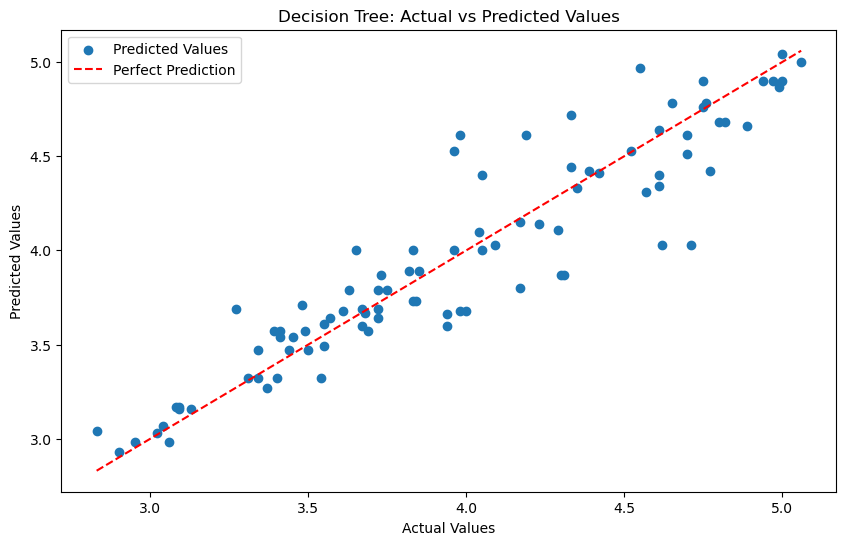

In [343]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced3, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced3)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced3)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [344]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.21855503734260187
RAE: 0.3056015291731742
MAE: 0.15489130434782608
R2: 0.8652336936766063


Mean Squared Error on Validation Set for Decision Tree: 0.07
Mean Squared Error for Decision Tree: 0.07


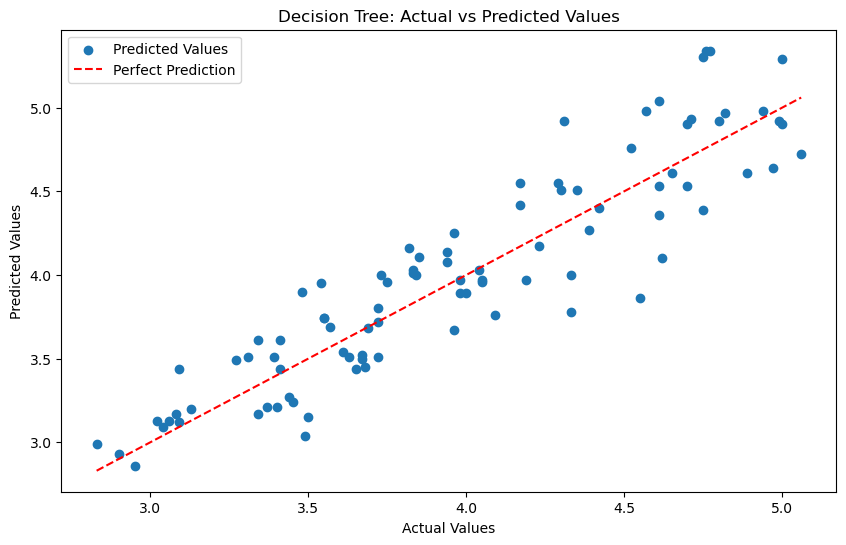

In [345]:
tree = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
tree.fit(x_train_scaled_reduced4, y_train)

yhat_cv = tree.predict(x_cv_scaled__reduced4)

# Evaluate the model
mse_cv = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Decision Tree: {mse_cv:.2f}")

# Predict on the test set
yhat_test = tree.predict(x_test_scaled_reduced4)

# Evaluate the model
mse_tree = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error for Decision Tree: {mse_tree:.2f}")

# Visualize the predicted values vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Decision Tree: Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [346]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.26350686815568475
RAE: 0.42526865428098565
MAE: 0.21554347826086961
R2: 0.8040958831665784


Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.01


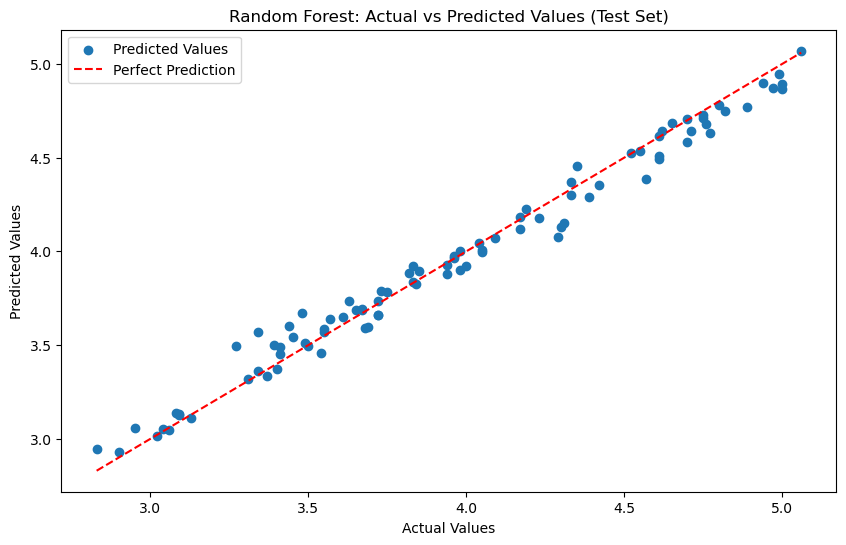

In [405]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [406]:
feature_list = ['Temp min', 'Temp max', 'Wind speed', 'Sunlight hours','Solar Radiation']
x_train_df = pd.DataFrame(x_train_scaled, columns=feature_list)

# Get feature importances
feature_list = list(x_train_df.columns)
feature_imp = pd.Series(rf_model.feature_importances_, index=feature_list).sort_values(ascending=False)

# Print feature importances
print(feature_imp)

Solar Radiation    0.639327
Temp max           0.141997
Sunlight hours     0.121038
Wind speed         0.093403
Temp min           0.004235
dtype: float64


In [407]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.0825109676504205
RAE: 0.12396055852117807
MAE: 0.06282826086956543
R2: 0.9807919603021835


Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.02


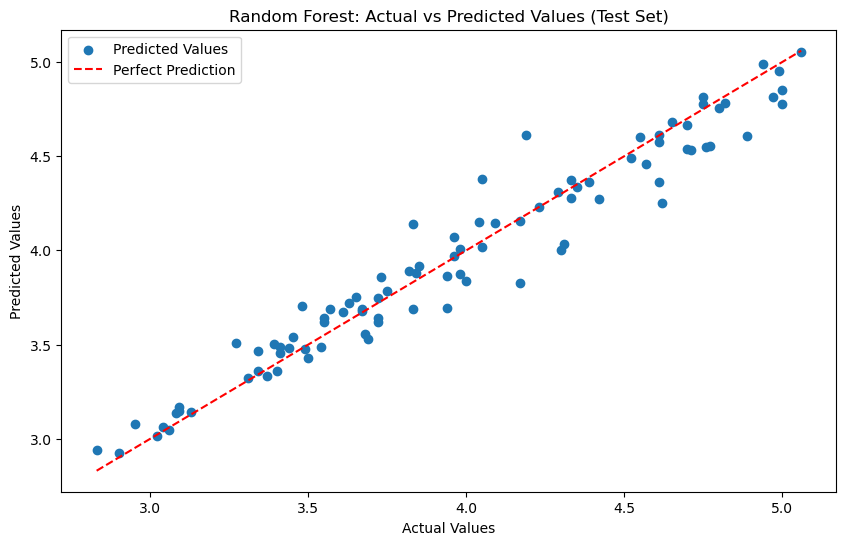

In [377]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [378]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13801338545669206
RAE: 0.19849301848528017
MAE: 0.10060434782608738
R2: 0.9462594505566483


Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.02


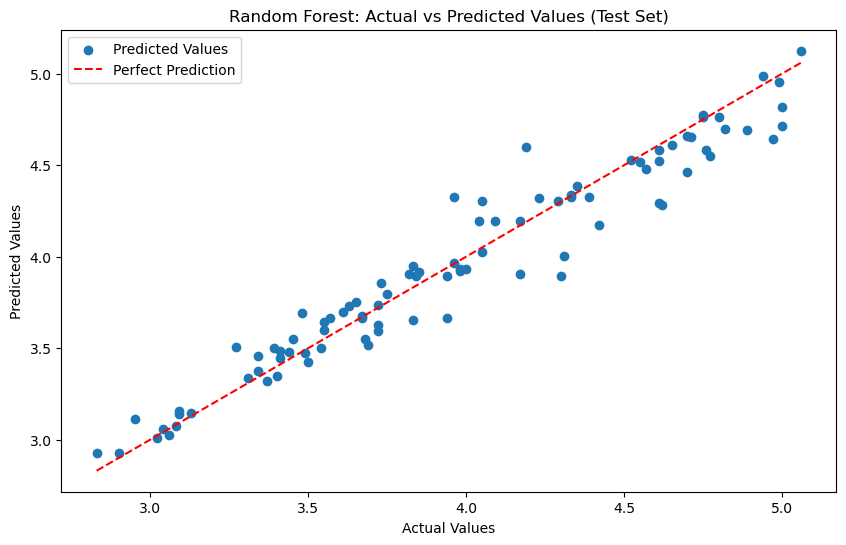

In [379]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced2, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [380]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1458314929904584
RAE: 0.2083494720156651
MAE: 0.10560000000000021
R2: 0.9399984695547128


Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.03


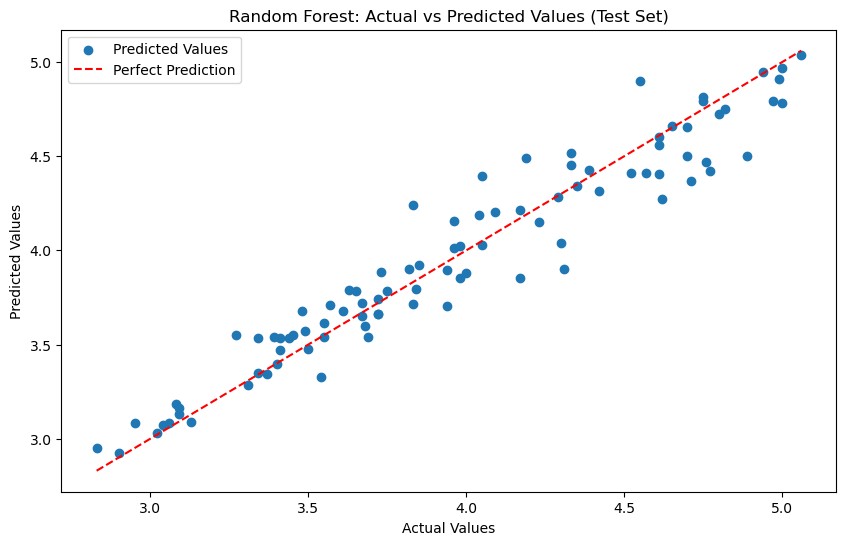

In [381]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced3, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [382]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.16112966794263664
RAE: 0.23826410872048265
MAE: 0.12076195652173896
R2: 0.926749480665348


Mean Squared Error on Validation Set for Random Forest: 0.07
Mean Squared Error on Test Set for Random Forest: 0.04


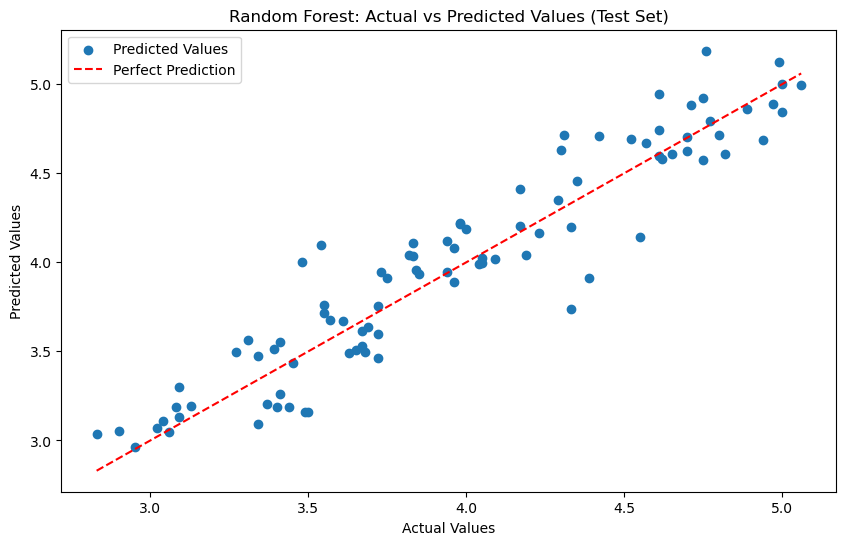

In [383]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(x_train_scaled_reduced4, y_train)

# Predict on the validation set
yhat_val = rf_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for Random Forest: {mse_val:.2f}")

# Predict on the test set
yhat_test = rf_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for Random Forest: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('Random Forest: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [384]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.20601362871759588
RAE: 0.32063926898062983
MAE: 0.16251304347826134
R2: 0.8802565993886254


Mean Squared Error on Validation Set for XGBoost: 0.01
Mean Squared Error on Test Set for XGBoost: 0.00


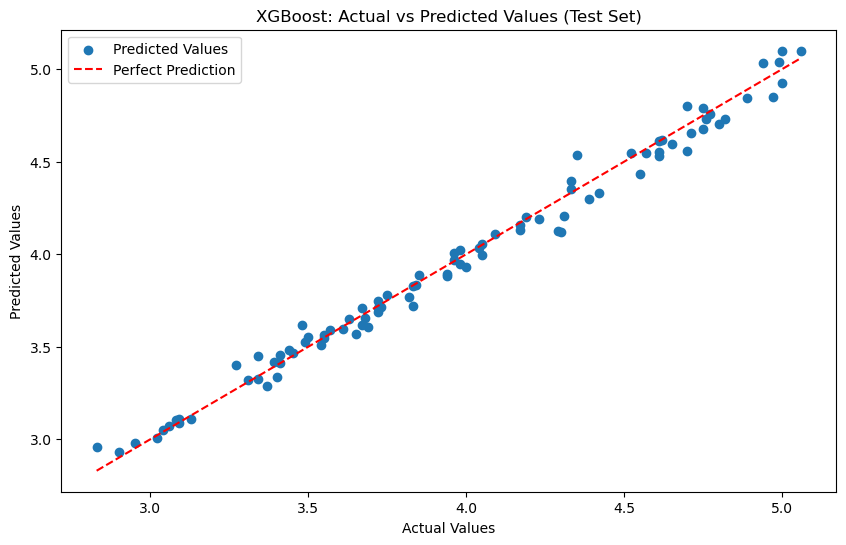

In [417]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Fit the model on the training data
xgb_model.fit(x_train_scaled, y_train)

# Predict on the validation set
yhat_cv = xgb_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Predict on the test set
yhat_test = xgb_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [418]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.06656964412441319
RAE: 0.10054807706313705
MAE: 0.050961861506752325
R2: 0.9874970597877091


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

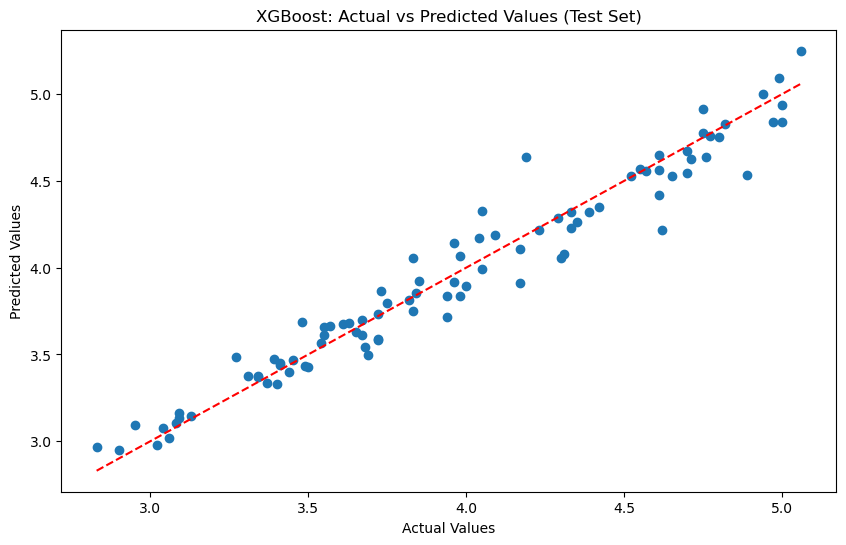

In [435]:
# Define the parameter grid to search
param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Instantiate an XGBoost regressor
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [436]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13025092683911055
RAE: 0.19139322814286933
MAE: 0.09700588485468989
R2: 0.9521346401151634


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.9}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

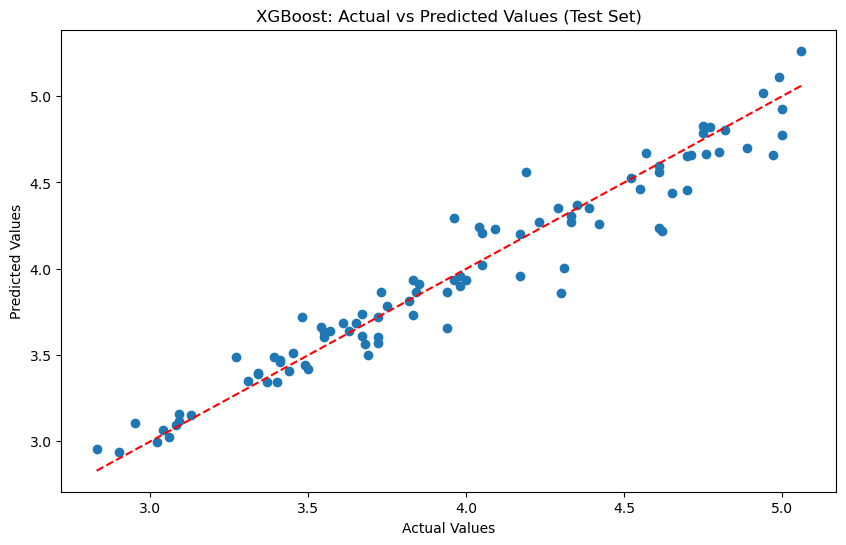

In [437]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [438]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.1435100906246278
RAE: 0.2068839924683223
MAE: 0.10485723526581472
R2: 0.9418935208097511


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200, 'subsample': 1.0}
Mean Squared Error on Validation Set for XGBoost: 0.02
Mean Squared Error on Test Set for XGBoost: 0.02


Text(0, 0.5, 'Predicted Values')

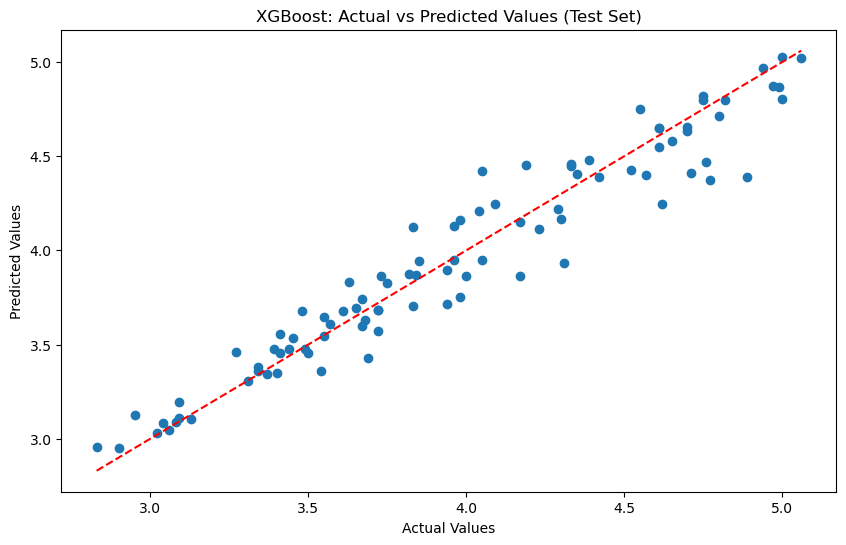

In [439]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [440]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.15424147444175004
RAE: 0.22670361377850598
MAE: 0.11490262674248734
R2: 0.9328784433027482


Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}
Mean Squared Error on Validation Set for XGBoost: 0.04
Mean Squared Error on Test Set for XGBoost: 0.04


Text(0, 0.5, 'Predicted Values')

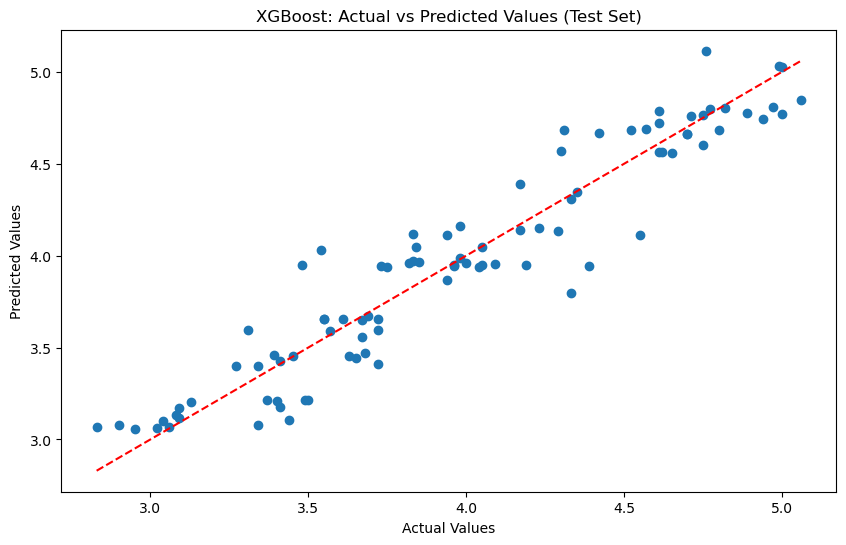

In [441]:
xgb_model = XGBRegressor(random_state=42)

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(xgb_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the XGBoost model with the best parameters
best_model = XGBRegressor(**best_params, random_state=42)
best_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_cv = best_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_cv)
print(f"Mean Squared Error on Validation Set for XGBoost: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for XGBoost: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('XGBoost: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [442]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.18987380054356948
RAE: 0.2874133901080984
MAE: 0.1456728145350581
R2: 0.8982838834657421


Best Parameters: {'C': 0.1, 'epsilon': 0.01, 'kernel': 'linear'}
Mean Squared Error on Validation Set for SVR: 0.00
Mean Squared Error on Test Set for SVR: 0.00


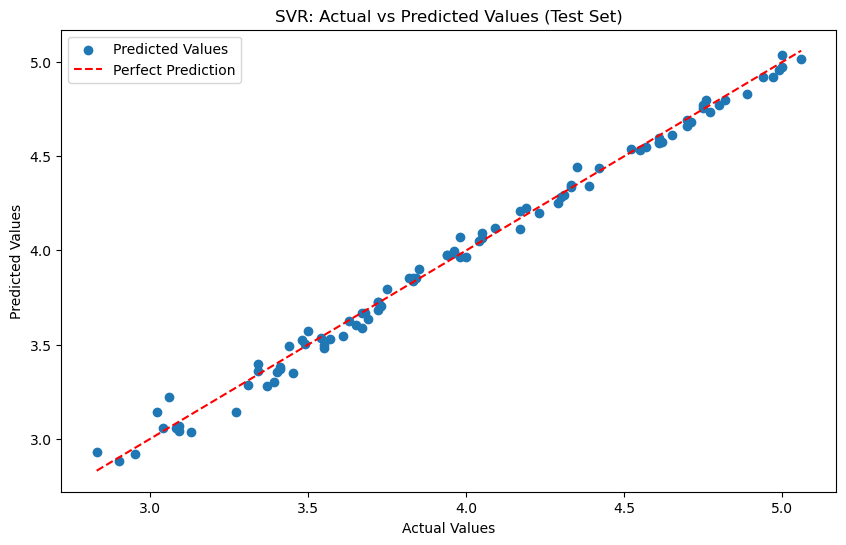

In [443]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [444]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.049249898292774374
RAE: 0.0775896320943118
MAE: 0.03932558633286723
R2: 0.9931566246701445


Best Parameters: {'C': 1, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.01
Mean Squared Error on Test Set for SVR: 0.02


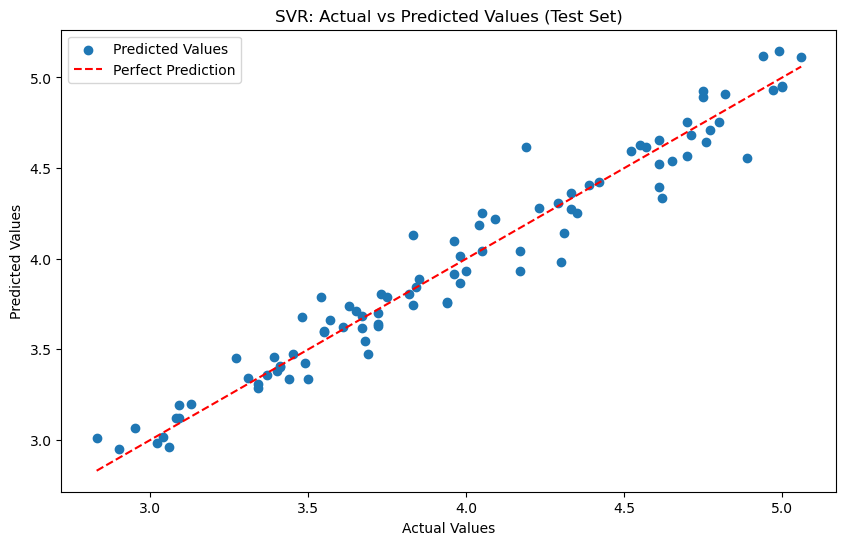

In [446]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [447]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.12822662598631002
RAE: 0.1920660216378059
MAE: 0.09734688400567387
R2: 0.9536108821768815


Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.01
Mean Squared Error on Test Set for SVR: 0.02


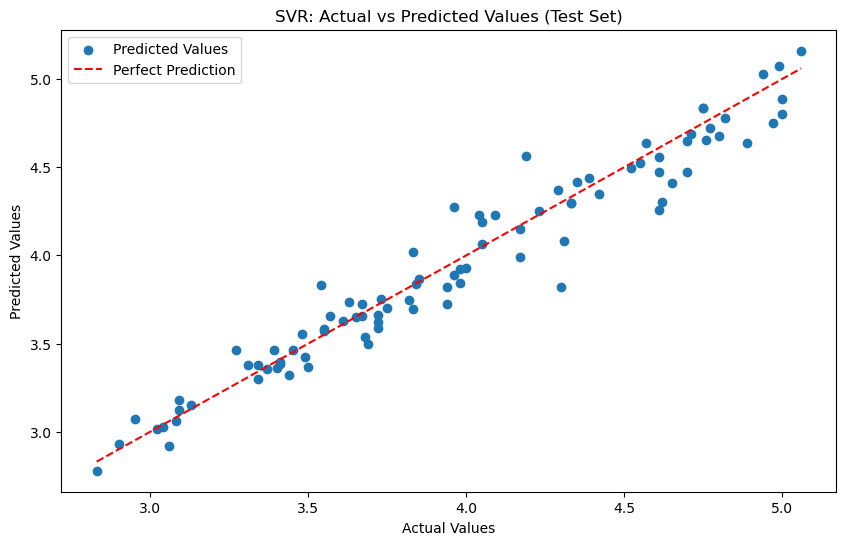

In [448]:
from sklearn.svm import SVR
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced2, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced2, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced2)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced2)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [449]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.13790271819765829
RAE: 0.20069328380263593
MAE: 0.10171953192165974
R2: 0.9463456006765194


Best Parameters: {'C': 10, 'epsilon': 0.01, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.02
Mean Squared Error on Test Set for SVR: 0.02


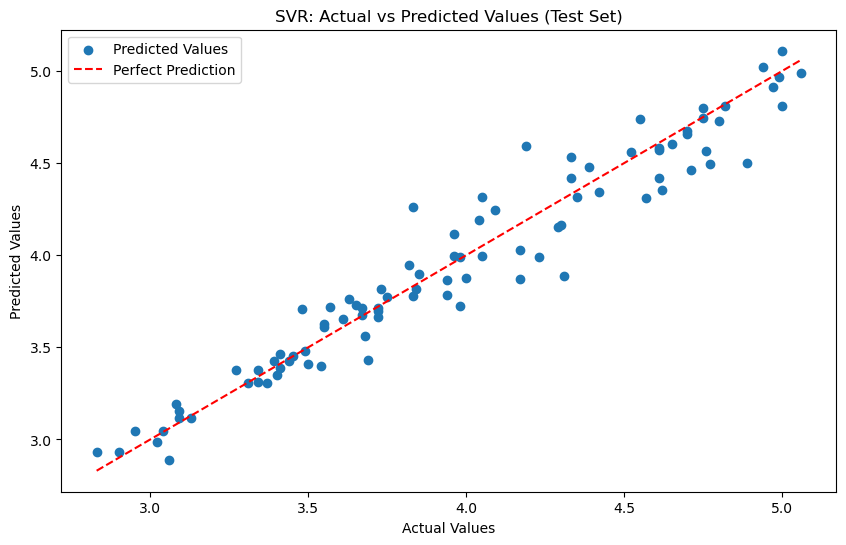

In [450]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced3, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced3, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced3)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced3)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [451]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.14794360448183444
RAE: 0.2142828774508255
MAE: 0.10860729158510118
R2: 0.9382478511000871


Best Parameters: {'C': 1, 'epsilon': 0.1, 'kernel': 'rbf'}
Mean Squared Error on Validation Set for SVR: 0.04
Mean Squared Error on Test Set for SVR: 0.04


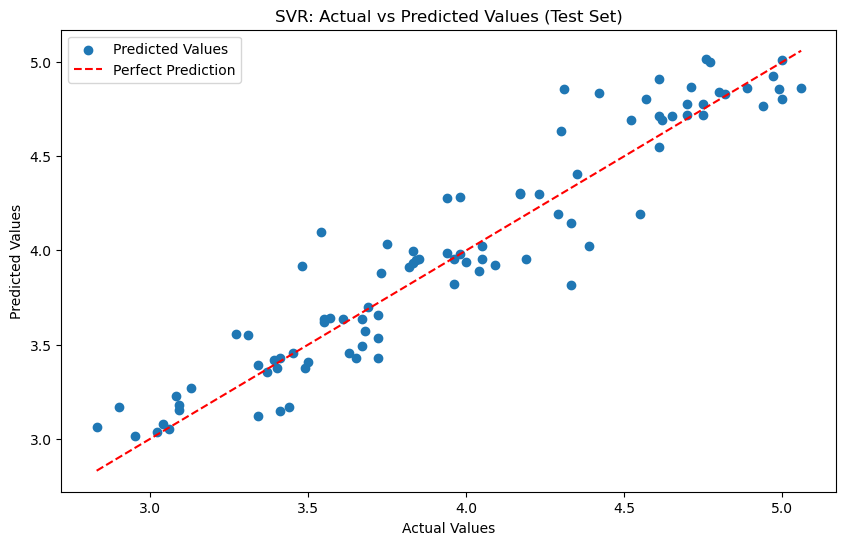

In [452]:
param_grid = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5],
}

# Instantiate an SVR model
svr_model = SVR()

# Use GridSearchCV to find the best parameters
grid_search = GridSearchCV(svr_model, param_grid, scoring='neg_mean_squared_error', cv=3)
grid_search.fit(x_train_scaled_reduced4, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the SVR model with the best parameters
best_svr_model = SVR(**best_params)
best_svr_model.fit(x_train_scaled_reduced4, y_train)

# Make predictions on the validation set
yhat_val = best_svr_model.predict(x_cv_scaled__reduced4)

# Evaluate the model on the validation set
mse_val = mean_squared_error(y_cv, yhat_val)
print(f"Mean Squared Error on Validation Set for SVR: {mse_val:.2f}")

# Make predictions on the test set
yhat_test = best_svr_model.predict(x_test_scaled_reduced4)

# Evaluate the model on the test set
mse_test = mean_squared_error(y_test, yhat_test)
print(f"Mean Squared Error on Test Set for SVR: {mse_test:.2f}")

# Visualize the predicted values vs actual values on the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, yhat_test, label='Predicted Values', marker='o')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', label='Perfect Prediction')
plt.title('SVR: Actual vs Predicted Values (Test Set)')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.show()

In [453]:
rmse = np.sqrt(mean_squared_error(y_test, yhat_test))
mae = mean_absolute_error(y_test, yhat_test)
rae = np.sum(np.abs(y_test - yhat_test.flatten())) / np.sum(np.abs(y_test - np.mean(y_test)))
r2 = r2_score(y_test, yhat_test)


print(f"RMSE: {rmse}")
print(f"RAE: {rae}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

RMSE: 0.19486470392872654
RAE: 0.29210851131897364
MAE: 0.1480524932310096
R2: 0.8928663138687131
